<a href="https://colab.research.google.com/github/NSnightKING/DDoS-attack-detection/blob/main/DDoS_Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Dataset loading

In [ ]:
df=pd.read_csv("/content/DDos.csv")
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


# Data Visualization

**Cleaning**

In [ ]:
df.shape

(66237, 79)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66237 entries, 0 to 66236
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             66237 non-null  int64  
 1    Flow Duration                66237 non-null  int64  
 2    Total Fwd Packets            66237 non-null  int64  
 3    Total Backward Packets       66237 non-null  int64  
 4   Total Length of Fwd Packets   66237 non-null  int64  
 5    Total Length of Bwd Packets  66237 non-null  int64  
 6    Fwd Packet Length Max        66237 non-null  int64  
 7    Fwd Packet Length Min        66237 non-null  int64  
 8    Fwd Packet Length Mean       66237 non-null  float64
 9    Fwd Packet Length Std        66237 non-null  float64
 10  Bwd Packet Length Max         66237 non-null  int64  
 11   Bwd Packet Length Min        66237 non-null  int64  
 12   Bwd Packet Length Mean       66237 non-null  float64
 13   

In [ ]:
# remove space before column name
df.columns = df.columns.str.strip()

check datatype

In [ ]:
pd.set_option('display.max_rows', None)
print(df.dtypes)
pd.set_option('display.max_rows', 15)

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
Total Length of Bwd Packets      int64
Fwd Packet Length Max            int64
Fwd Packet Length Min            int64
Fwd Packet Length Mean         float64
Fwd Packet Length Std          float64
Bwd Packet Length Max            int64
Bwd Packet Length Min            int64
Bwd Packet Length Mean         float64
Bwd Packet Length Std          float64
Flow Bytes/s                   float64
Flow Packets/s                 float64
Flow IAT Mean                  float64
Flow IAT Std                   float64
Flow IAT Max                     int64
Flow IAT Min                     int64
Fwd IAT Total                    int64
Fwd IAT Mean                   float64
Fwd IAT Std                    float64
Fwd IAT Max                      int64
Fwd IAT Min                      int64
Bwd IAT Total            

In [ ]:
df.dtypes

,0
Destination Port,int64
Flow Duration,int64
Total Fwd Packets,int64
Total Backward Packets,int64
Total Length of Fwd Packets,int64
...,...
Idle Mean,float64
Idle Std,float64
Idle Max,float64
Idle Min,float64


**check Nulls**

In [ ]:
df.isnull().sum().sum()

np.int64(47)

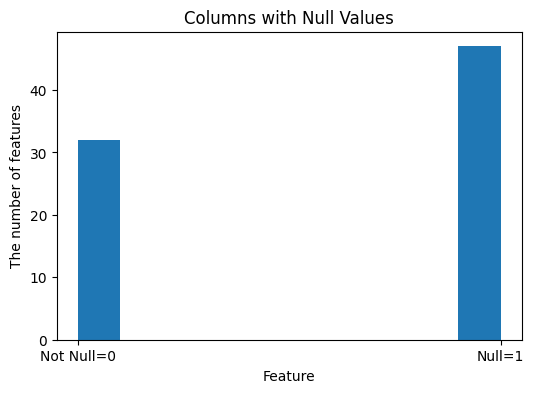

In [ ]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 6 ,4))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

# Show the plot
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
print(df.isnull().sum())
pd.set_option('display.max_rows', 15)

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
Total Length of Bwd Packets    0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                   0
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Min                    0
Bwd IAT Total                  0
Bwd IAT Mean                   0
Bwd IAT Std                    0
Bwd IAT Max                    0
Bwd IAT Min                    0
Fwd PSH Fl

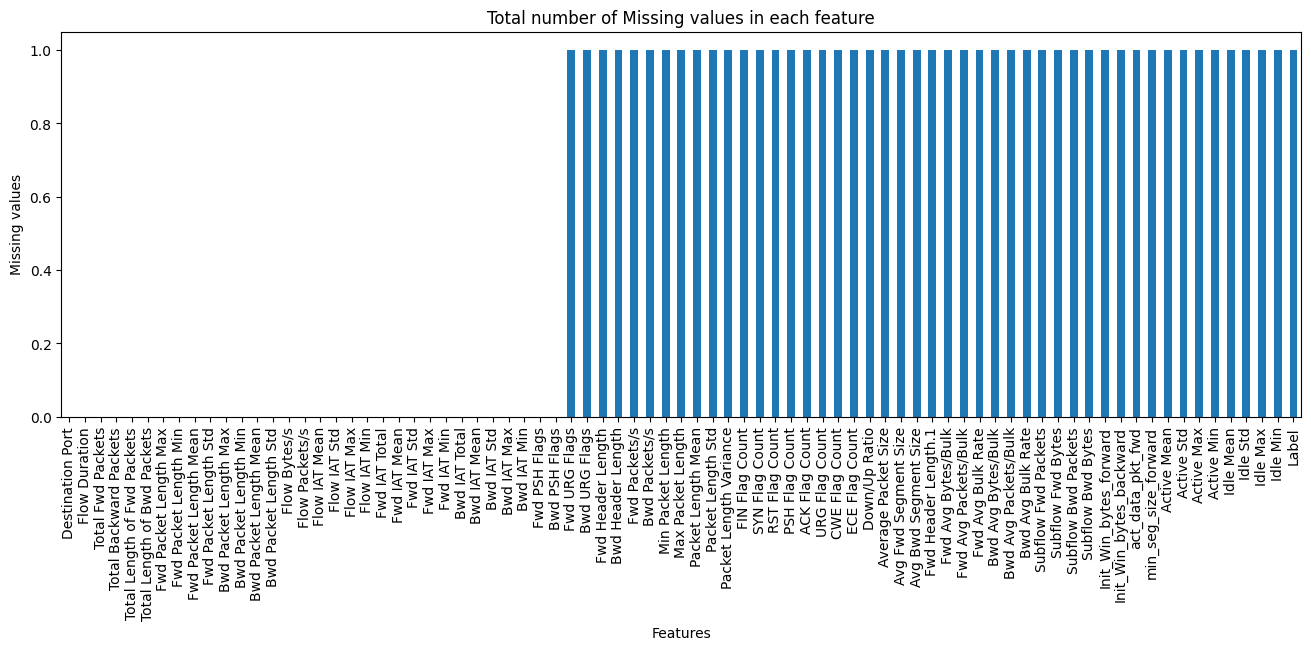

In [ ]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)

# Check For Duplicates

In [ ]:
dups_total = df[df.duplicated(keep=False)]
dups_unique = df[df.duplicated(keep='first')]

print(len(dups_total), 'total duplicates')
print(len(dups_unique), 'unique duplicates')

858 total duplicates
530 unique duplicates


# Remove Null Values

In [ ]:
## Removing the null values
data_f=df.dropna()

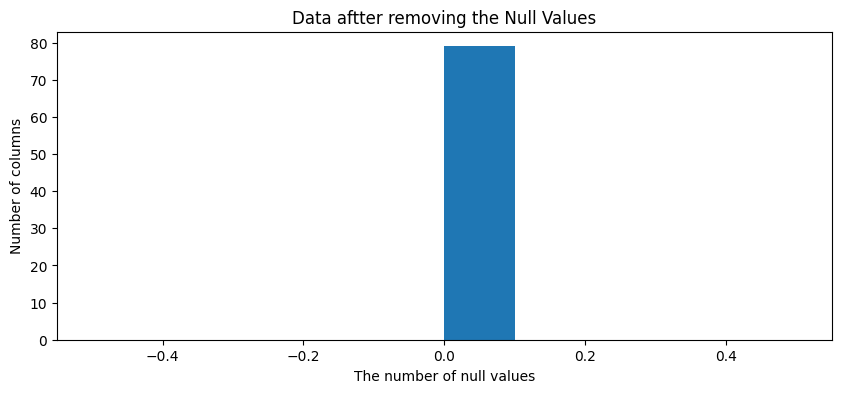

In [ ]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())

plt.title('Data aftter removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')

# Show the plot
plt.show()

# Check unique value in label

In [ ]:
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

In [ ]:


pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
null_values=data_f.isnull().sum()  # Check for NaN values



<ipython-input-16-1adbc0a72dbe>:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)  # Treat inf as NaN


In [ ]:
# check is there any object datatype . if yes how many are there

object_dtypes = df.select_dtypes(include=['object'])
num_object_cols = len(object_dtypes.columns)

if num_object_cols > 0:
    print(f"Yes, there are {num_object_cols} columns with object datatype.")
    print("Column names:", object_dtypes.columns.tolist())
else:
    print("No columns with object datatype found.")


Yes, there are 1 columns with object datatype.
Column names: ['Label']


In [ ]:
# To know the data types of the columns

(data_f.dtypes=='object')

,0
Destination Port,False
Flow Duration,False
Total Fwd Packets,False
Total Backward Packets,False
Total Length of Fwd Packets,False
...,...
Idle Mean,False
Idle Std,False
Idle Max,False
Idle Min,False


In [ ]:
# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})

<ipython-input-19-4f96cf6dbfb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'BENIGN': 0, 'DDoS': 1})


In [ ]:
df.Label.value_counts()

,count
Label,
DDoS,34952
BENIGN,31284


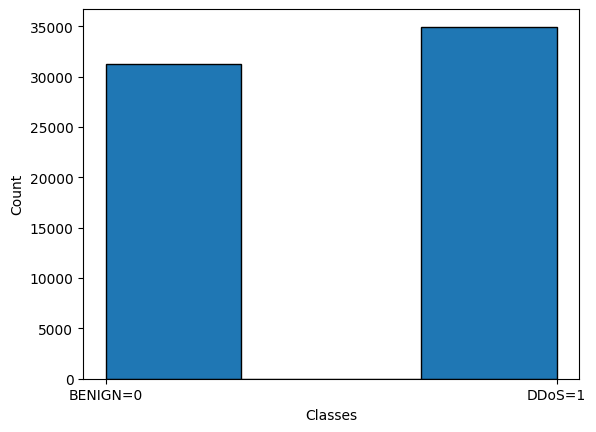

In [ ]:
# Print the DataFrame

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['BENIGN=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()


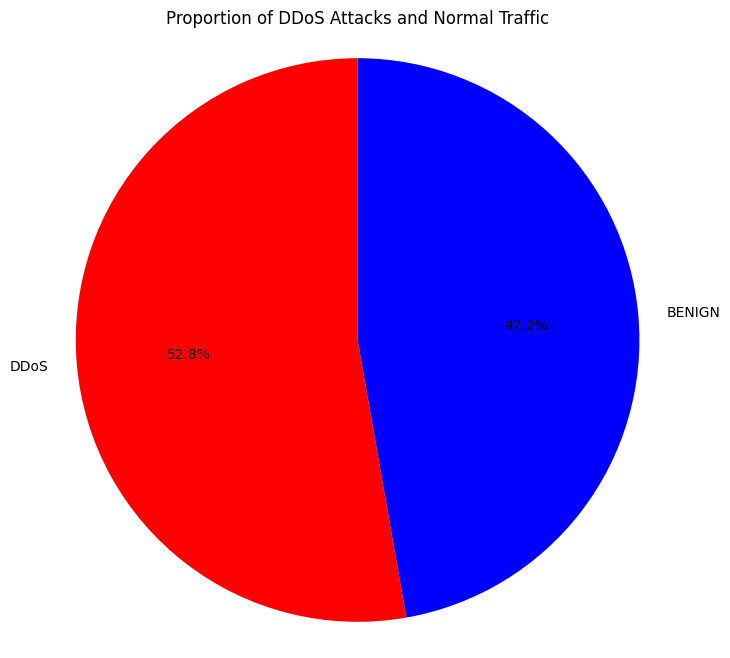

In [ ]:
# Calculate the value counts for the 'Label' column
label_counts = df['Label'].value_counts()

# Create a dictionary to map labels to colors
colors = {'BENIGN': 'blue', 'DDoS': 'red'}

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90,
        colors=[colors[label] for label in label_counts.index])  # Assign colors based on label
plt.title('Proportion of DDoS Attacks and Normal Traffic')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,6.623700e+04,66237.000000,66237.000000,66237.000000,66237.000000,...,66236.000000,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04
mean,6454.605553,1.388736e+07,5.180262,5.119223,695.622567,6.716837e+03,351.442064,23.465797,110.715335,135.438642,...,3.447793,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06
std,16710.894455,2.815843e+07,16.873659,23.797124,3230.046907,4.222698e+04,1435.510506,136.608403,400.376692,613.421563,...,13.108006,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.995600e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,9.949050e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.639831e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,4.000000,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


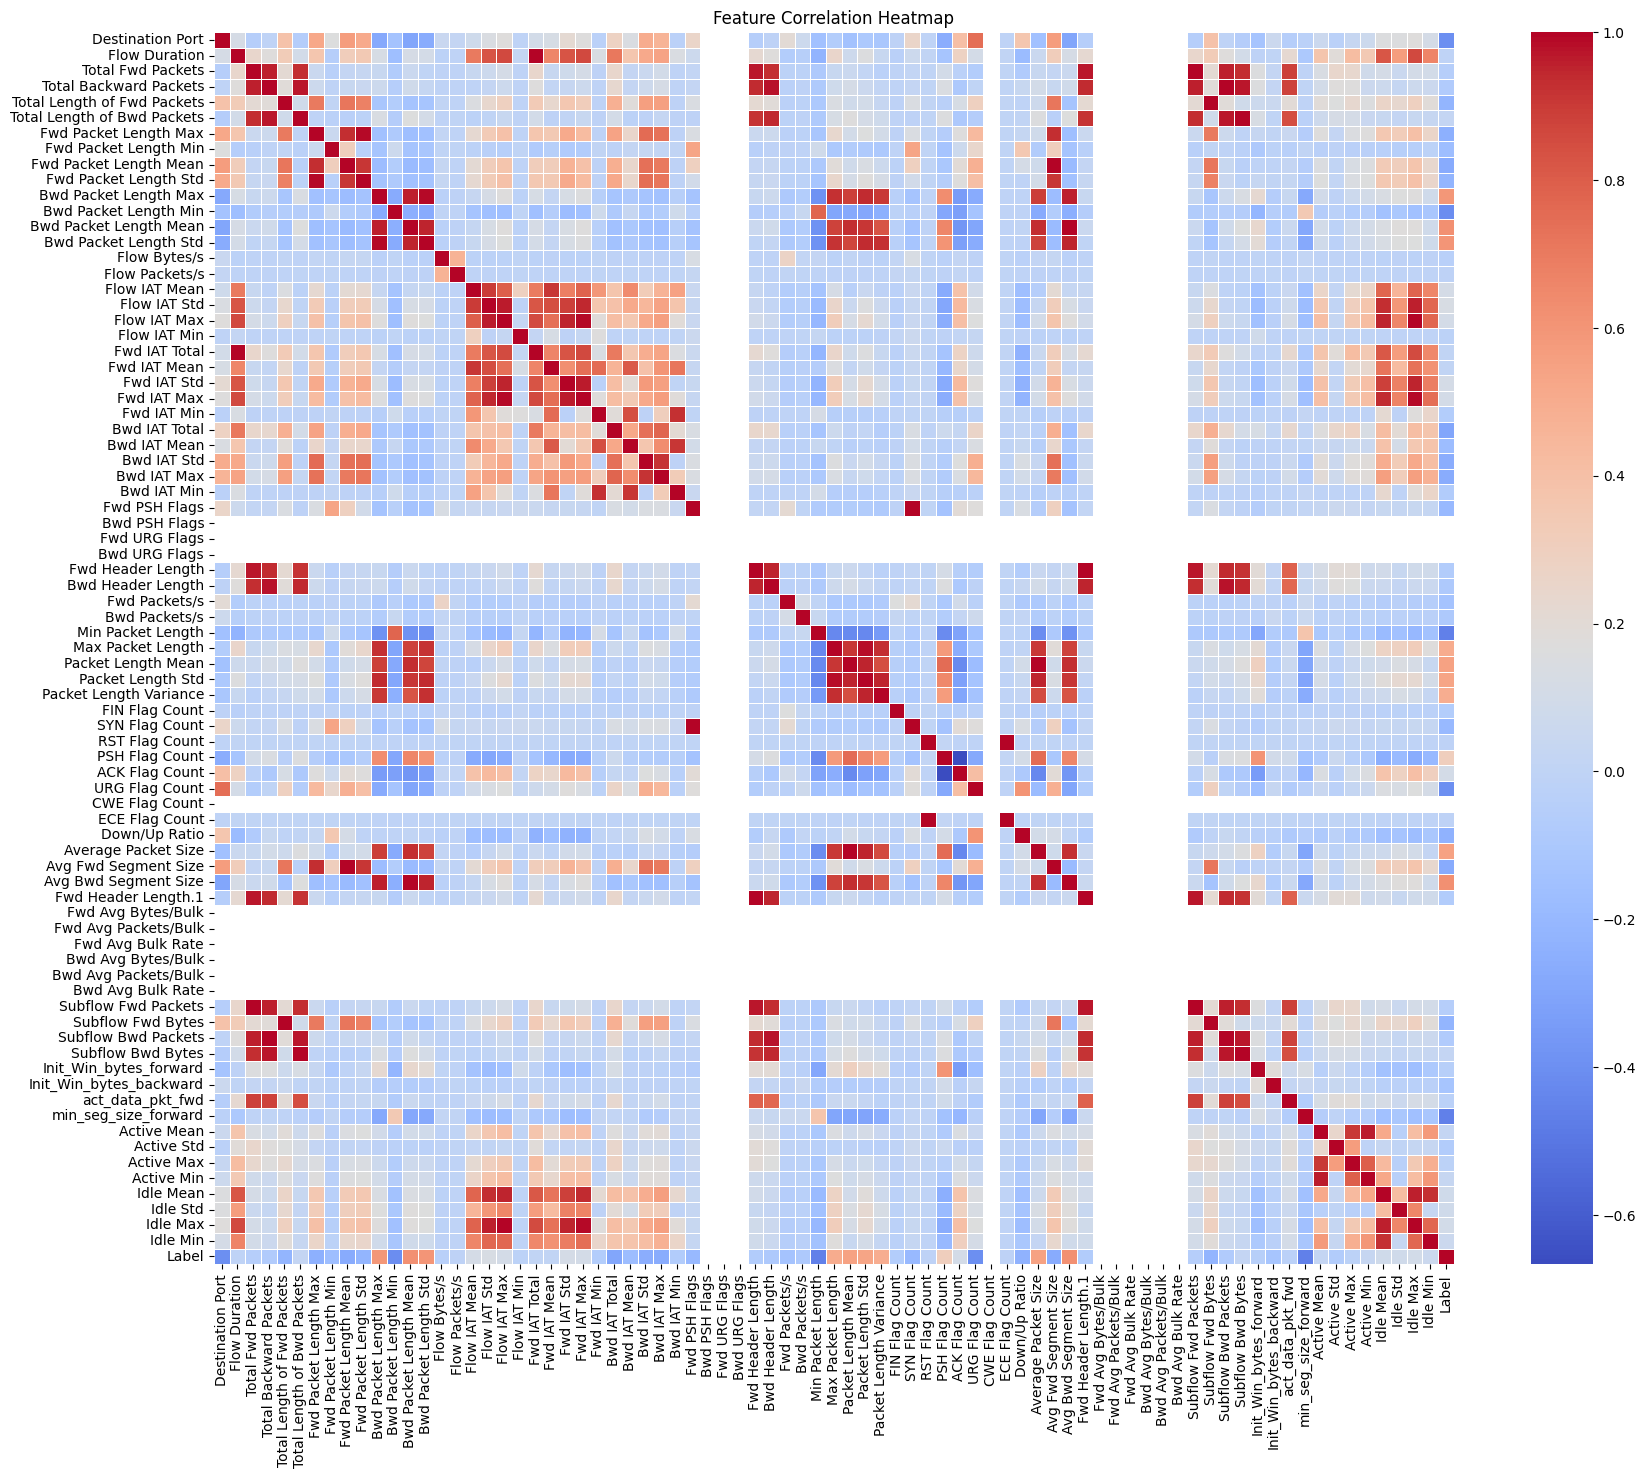

In [ ]:

# One-hot encode categorical features in 'data_f'
df_encoded = pd.get_dummies(data_f, columns=[col for col in data_f.columns if data_f[col].dtype == 'object'], drop_first=True)

# Calculate the correlation matrix
numerical_cols = df_encoded.select_dtypes(include=['number']).columns.tolist()
if ' Label' in numerical_cols:
    numerical_cols.remove(' Label')
correlation_matrix = df_encoded[numerical_cols].corr()


plt.figure(figsize=(20, 16))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.savefig('feature_correlation_heatmap.png')
plt.show()

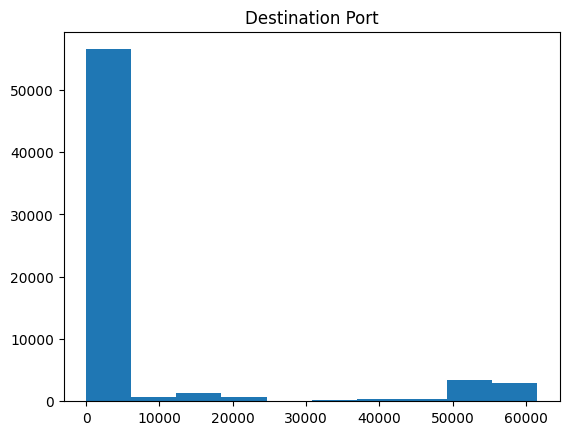

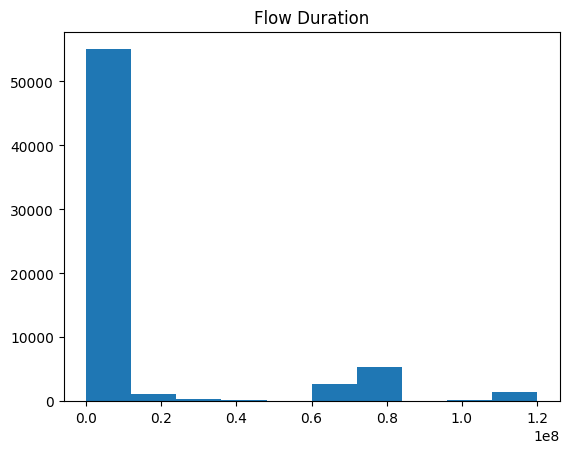

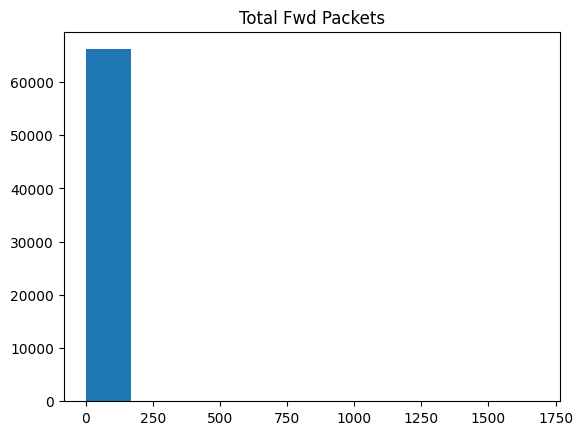

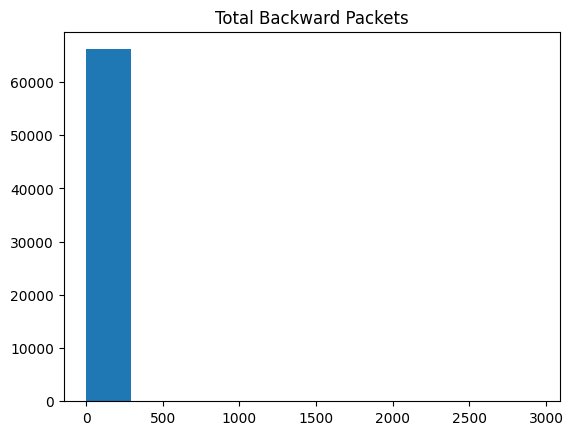

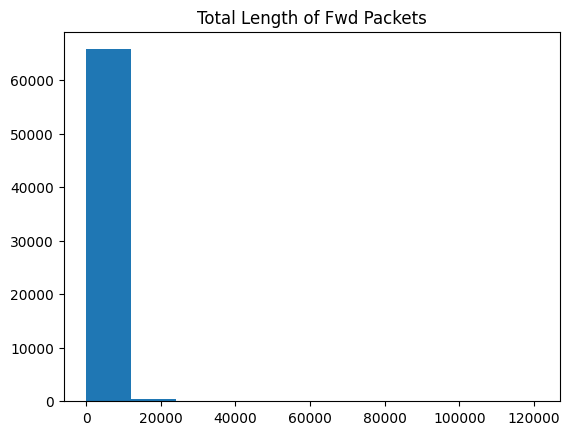

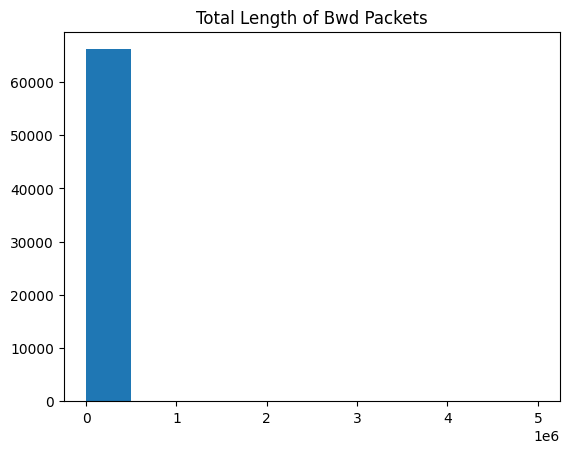

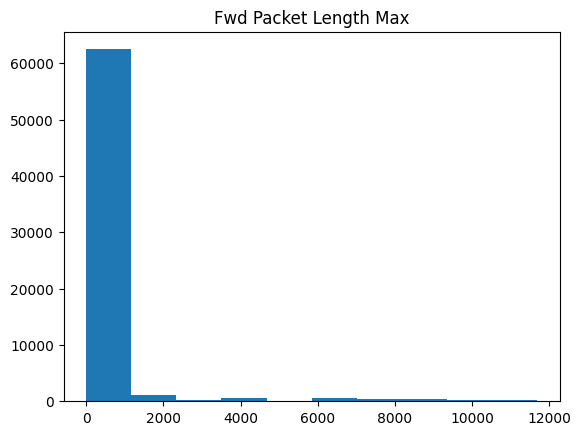

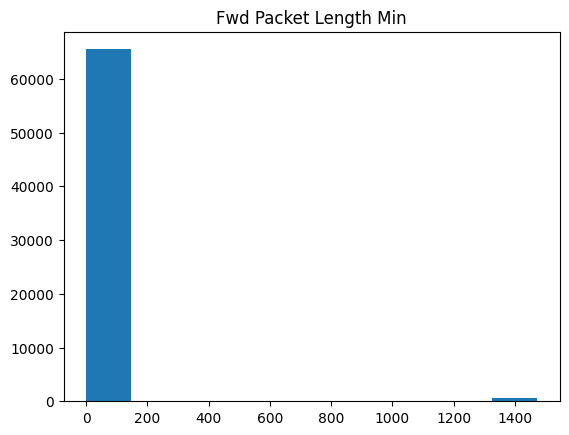

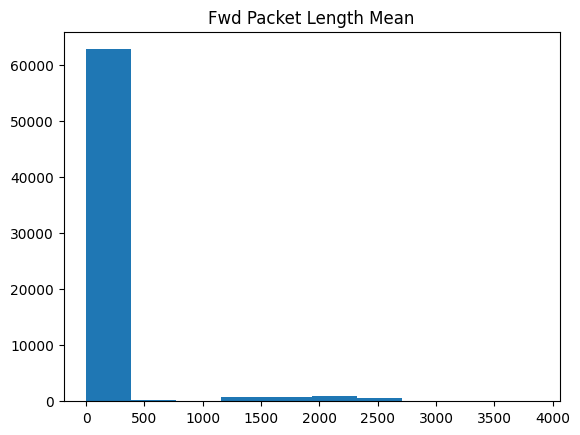

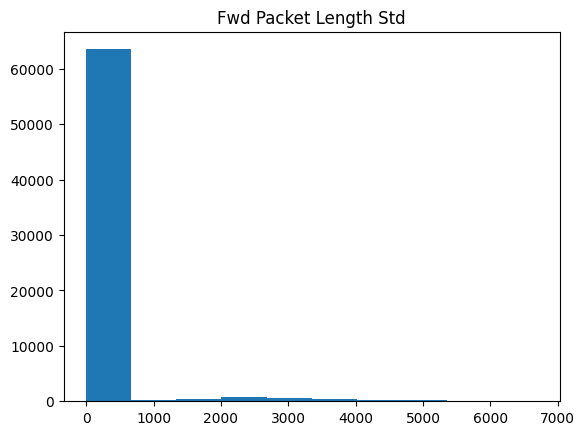

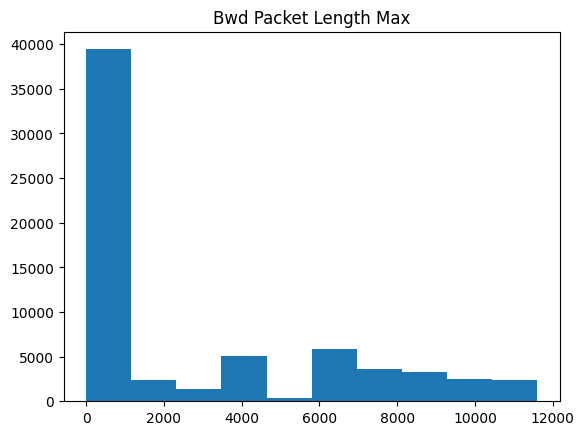

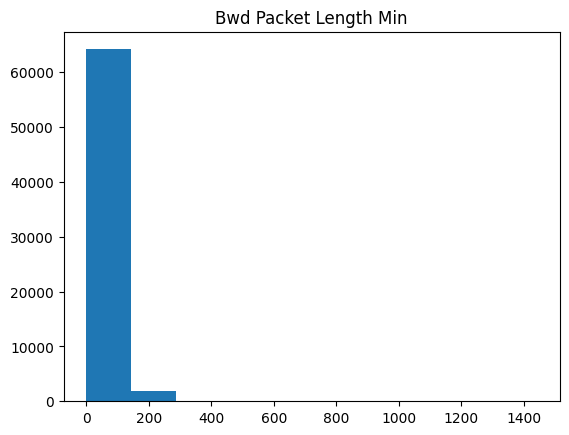

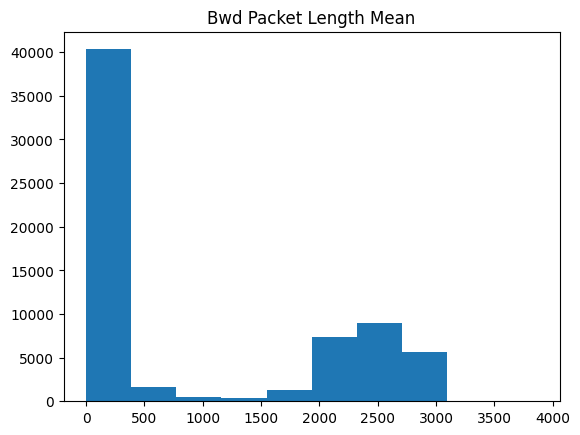

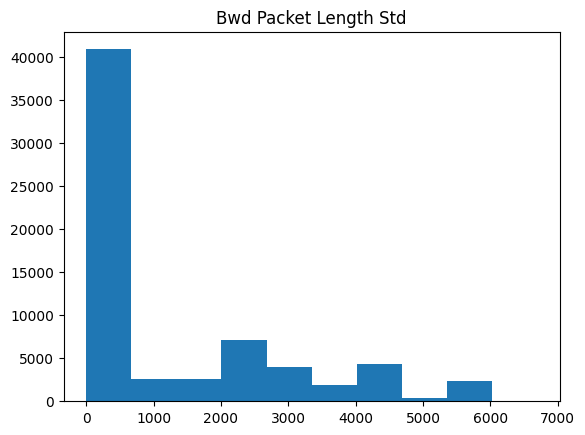

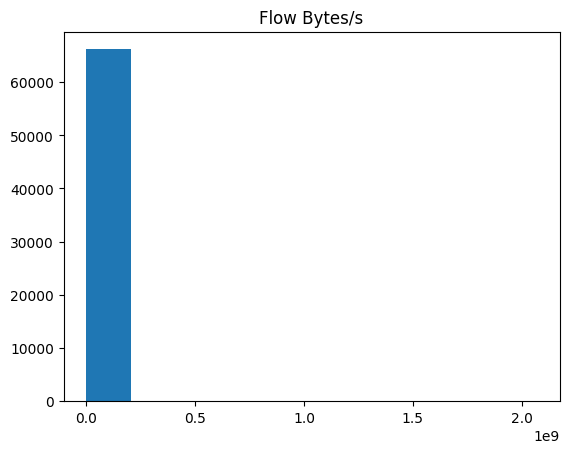

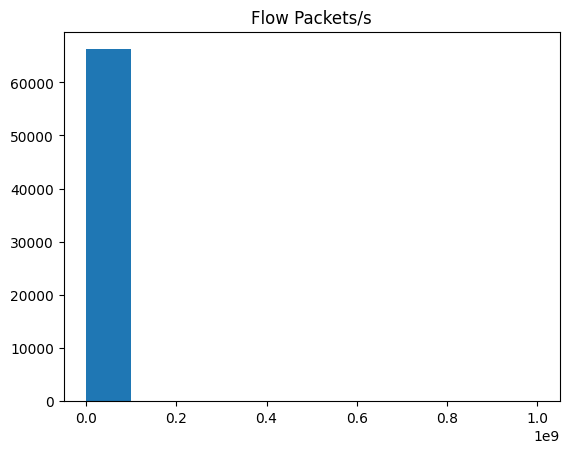

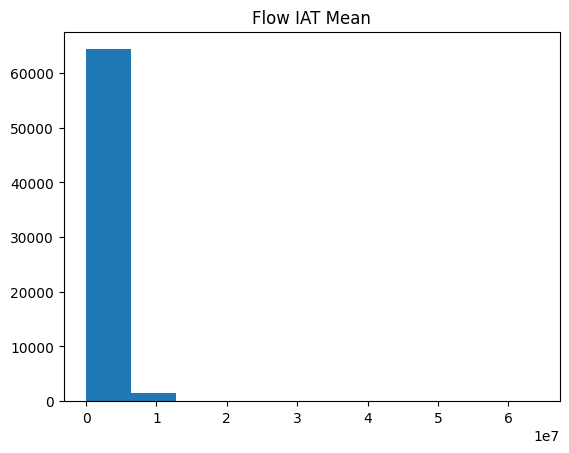

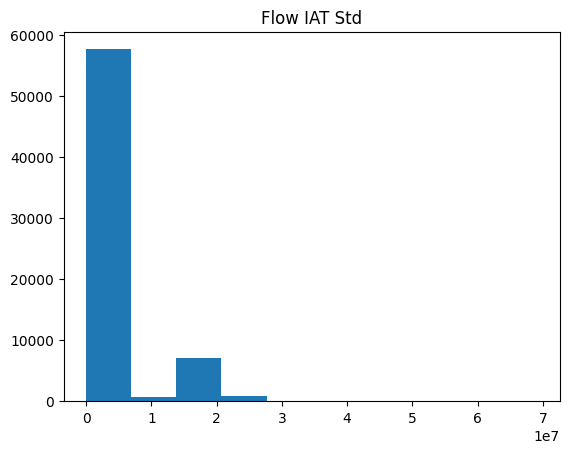

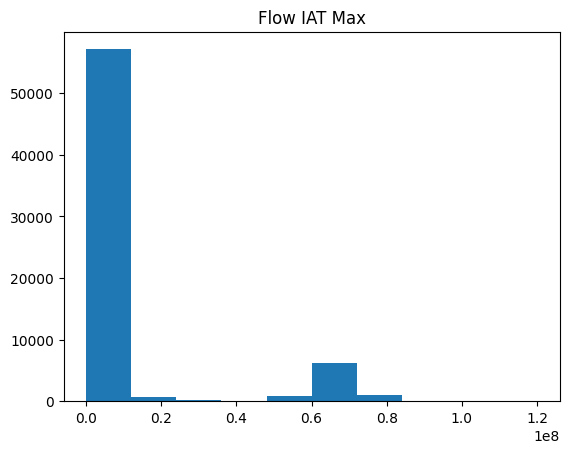

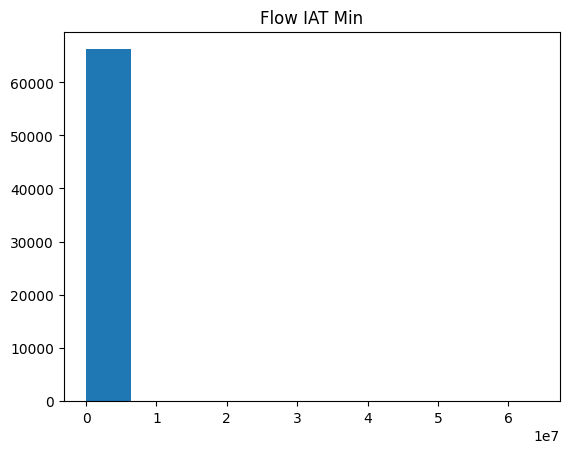

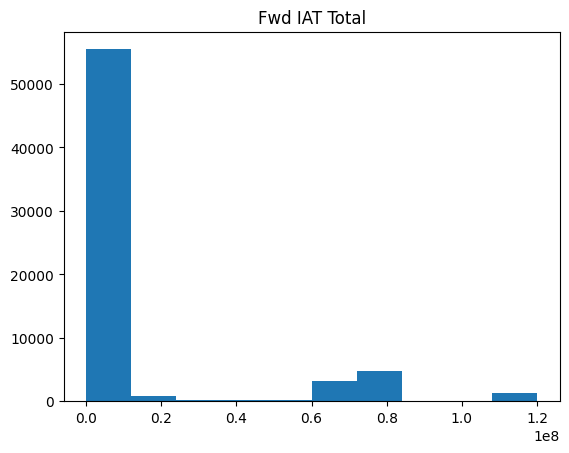

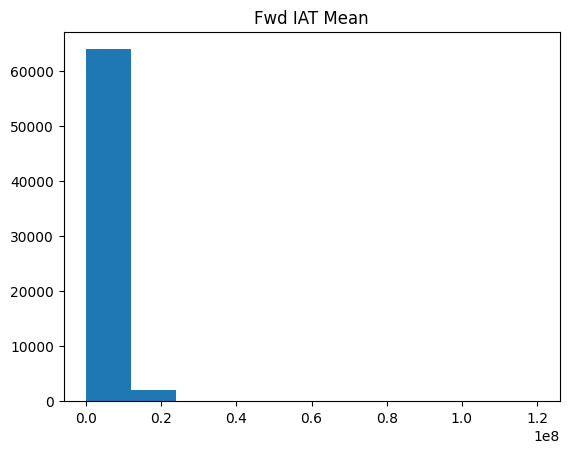

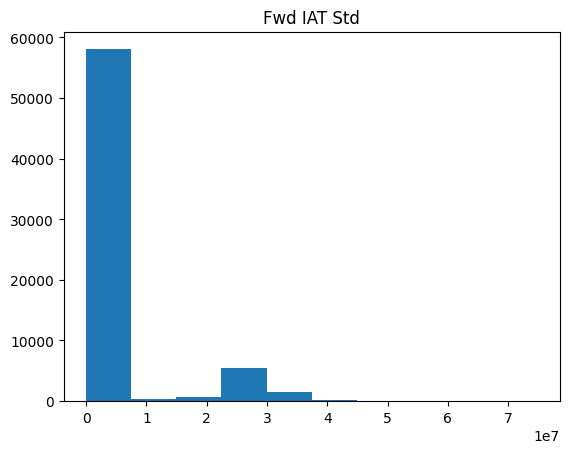

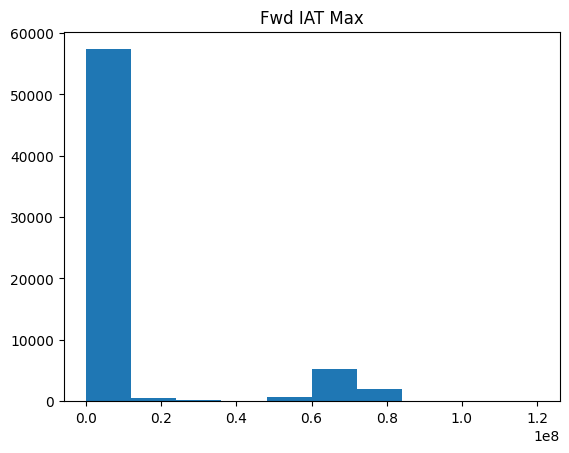

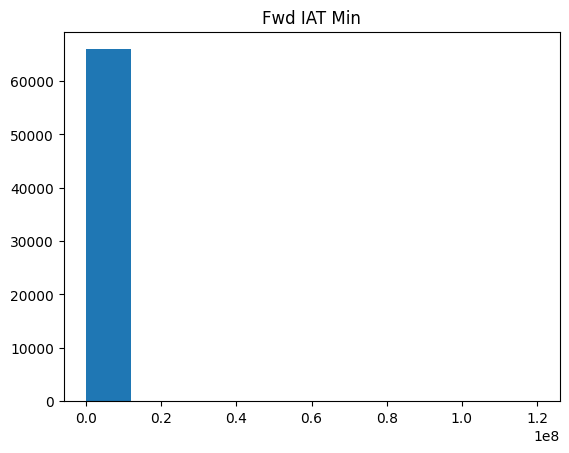

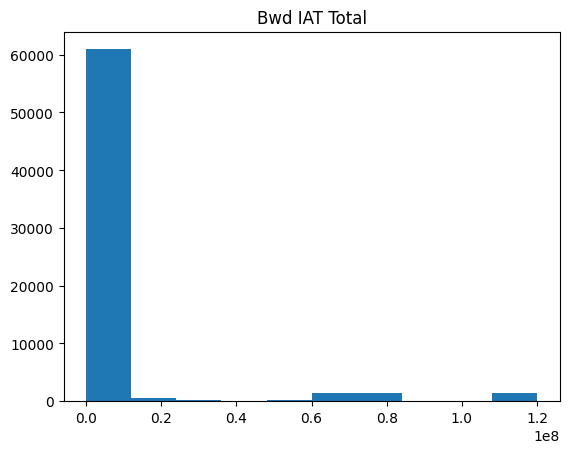

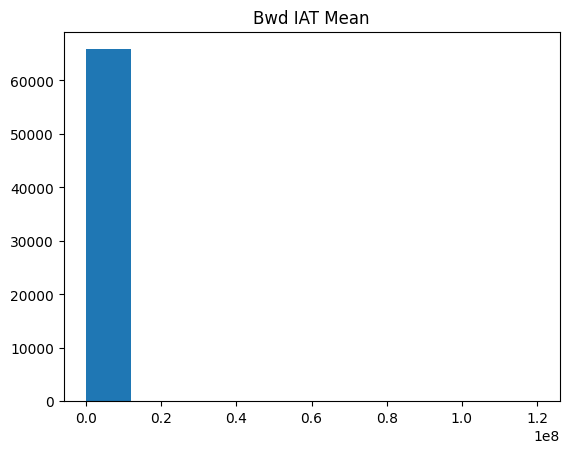

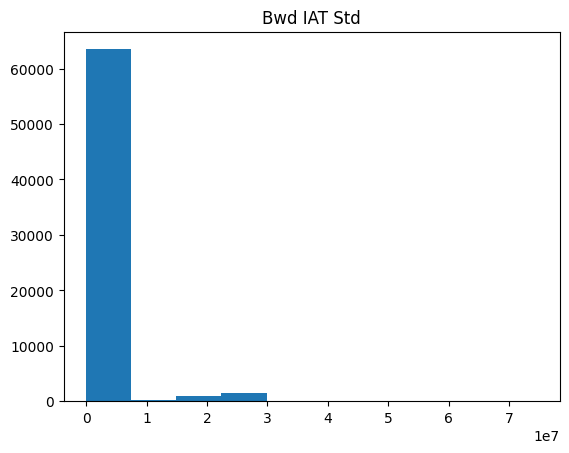

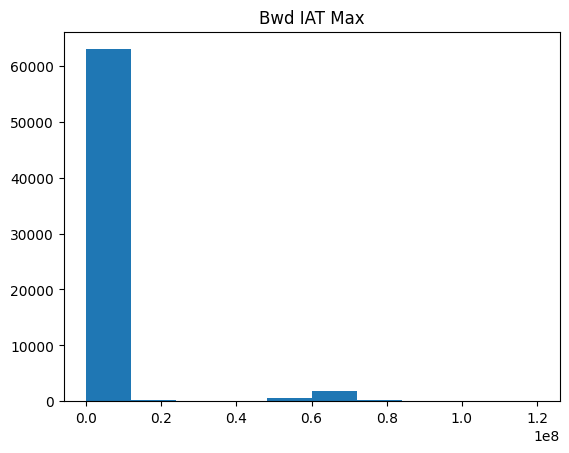

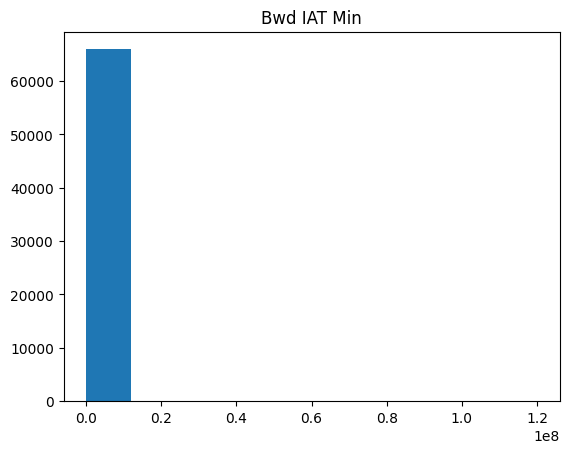

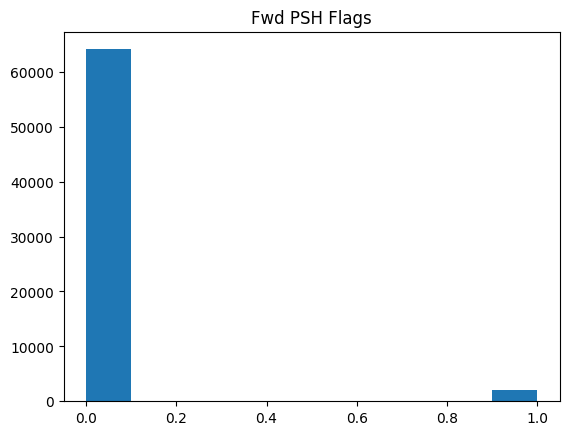

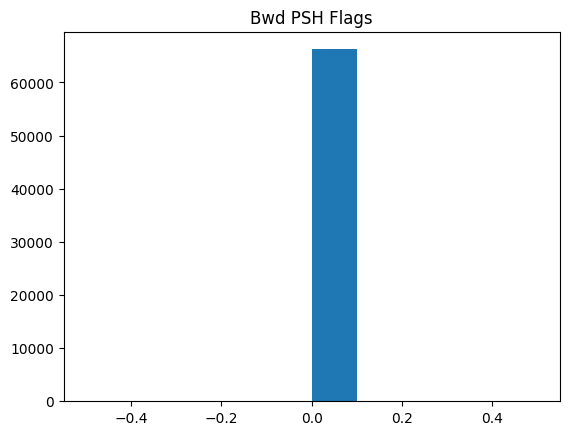

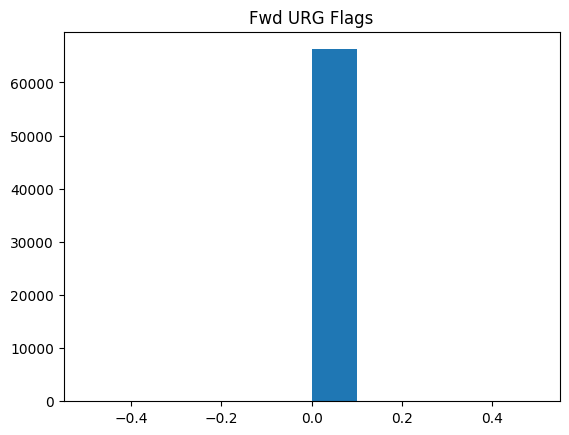

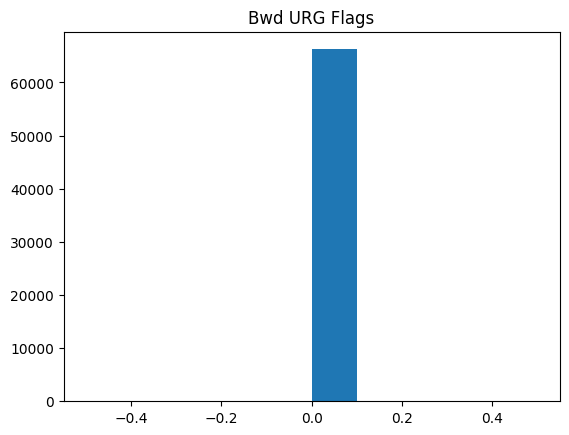

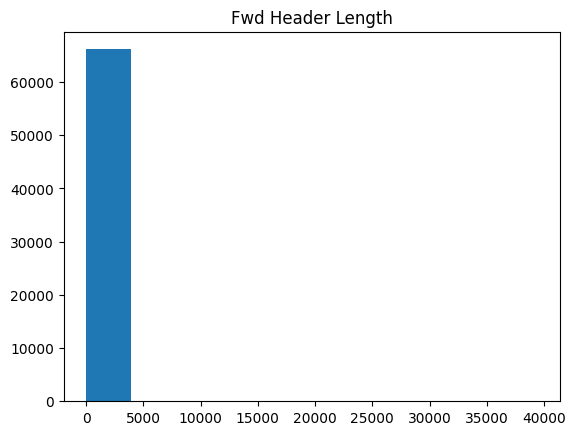

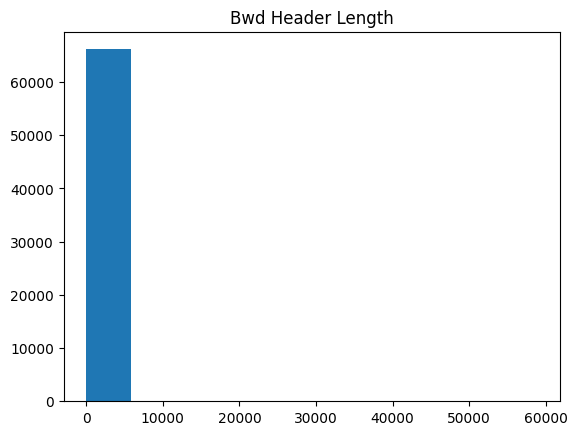

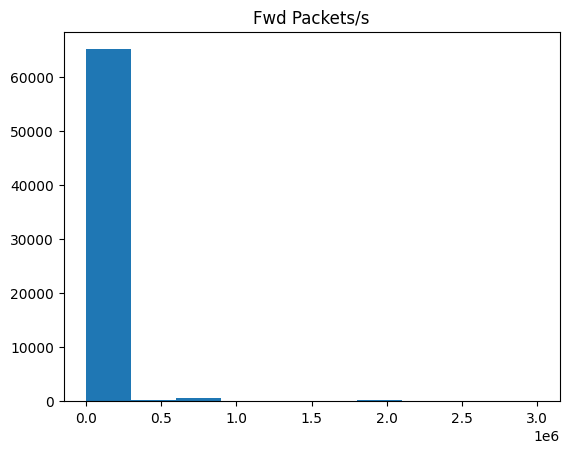

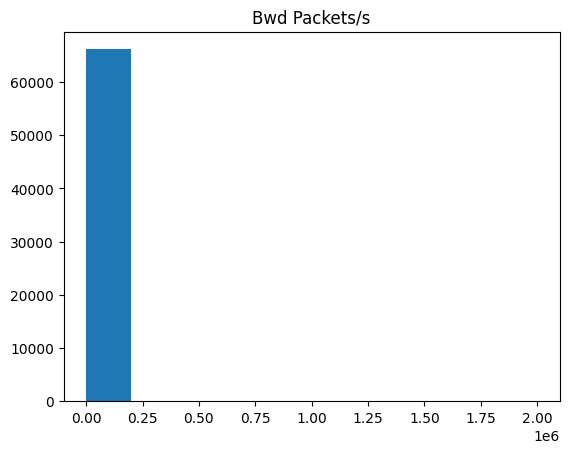

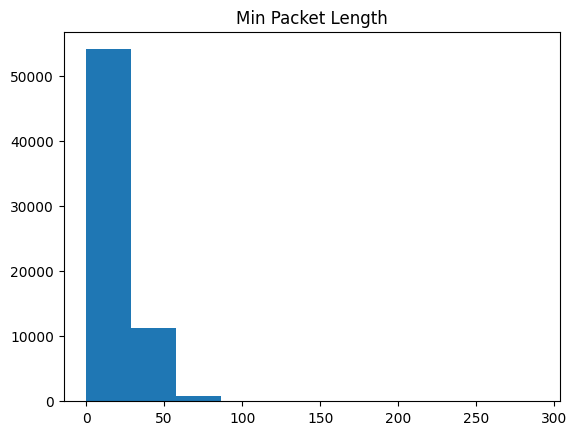

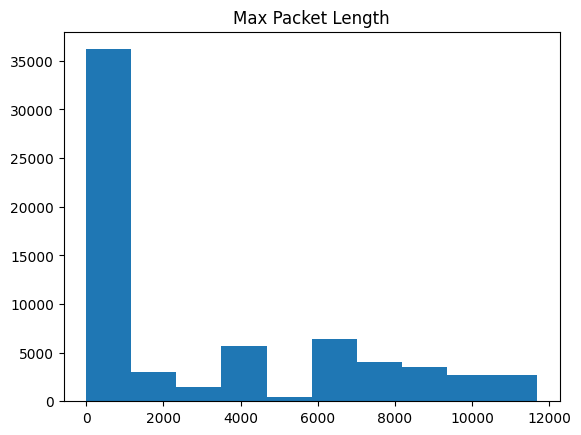

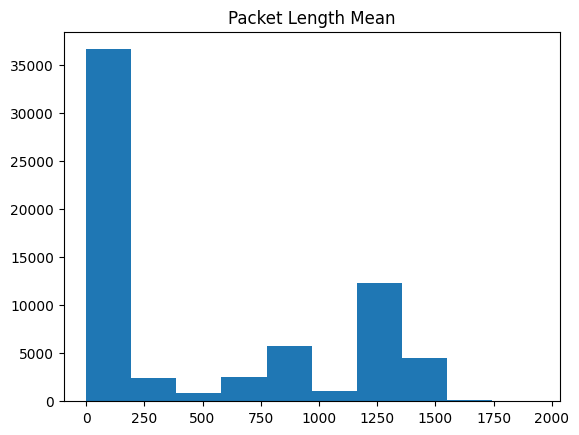

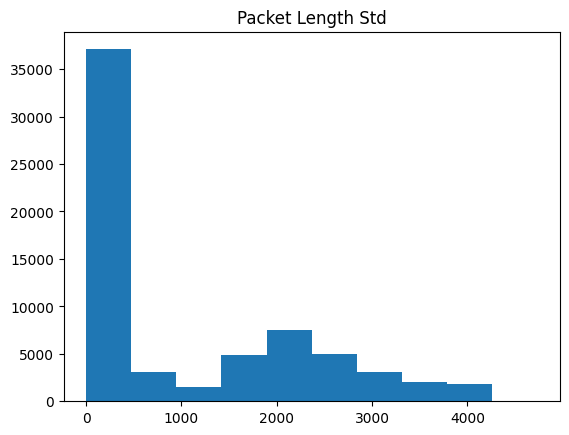

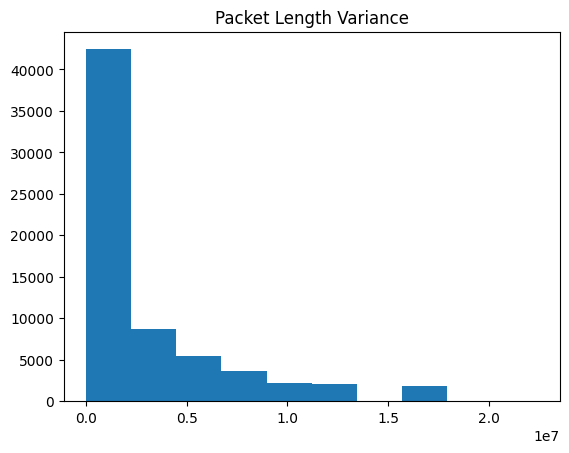

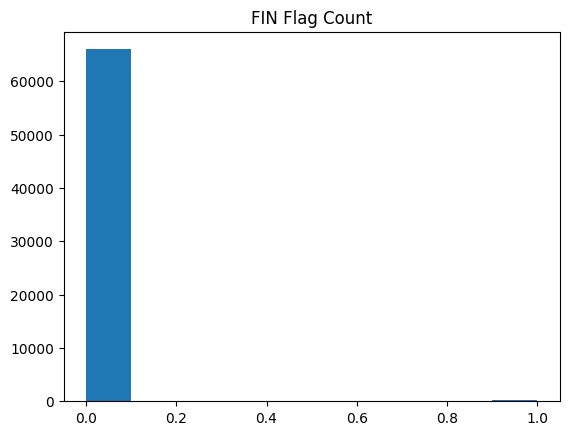

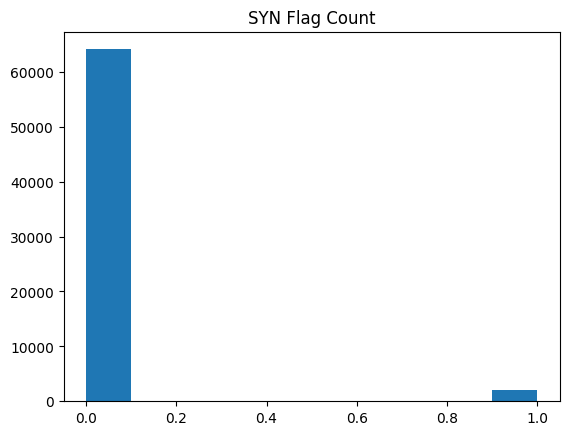

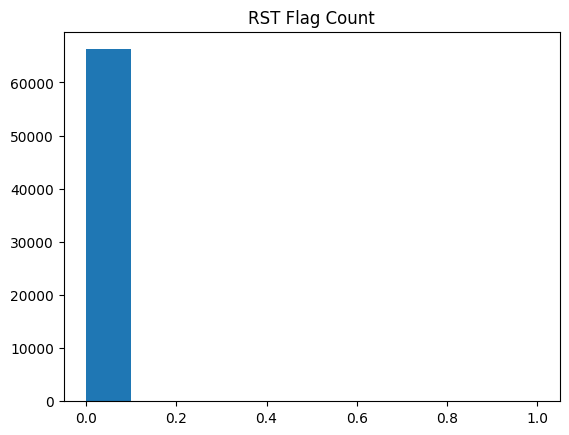

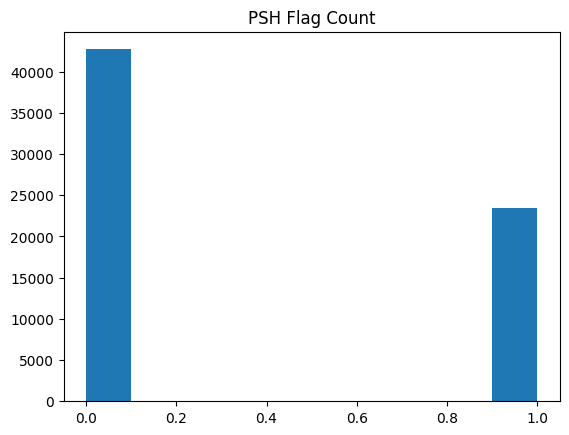

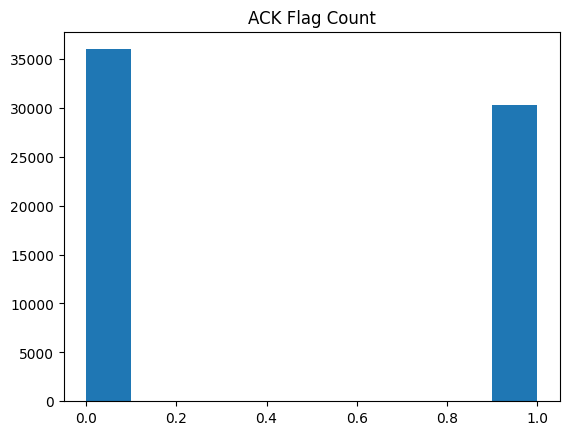

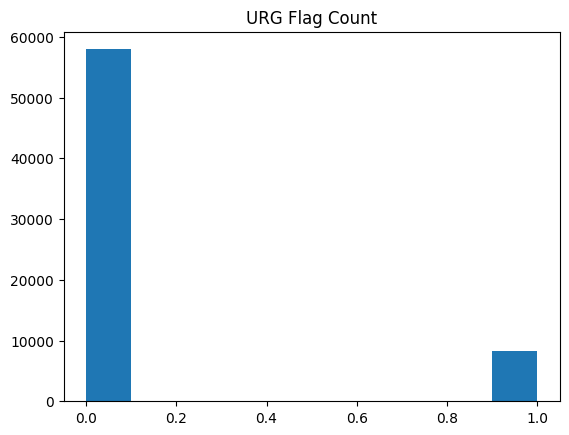

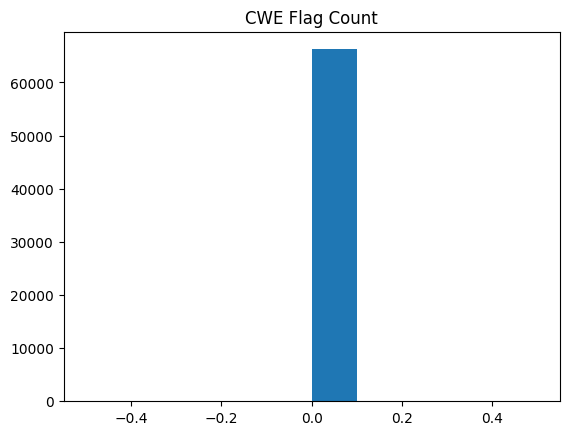

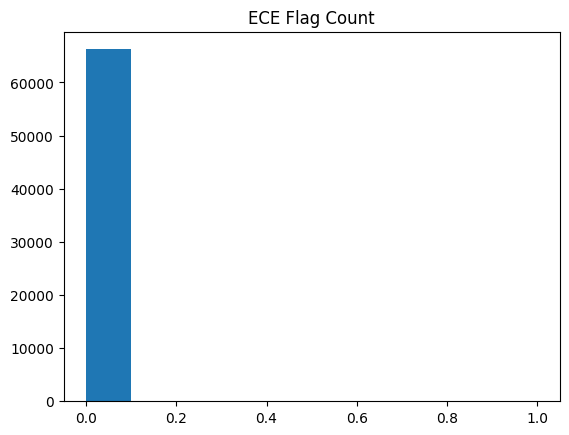

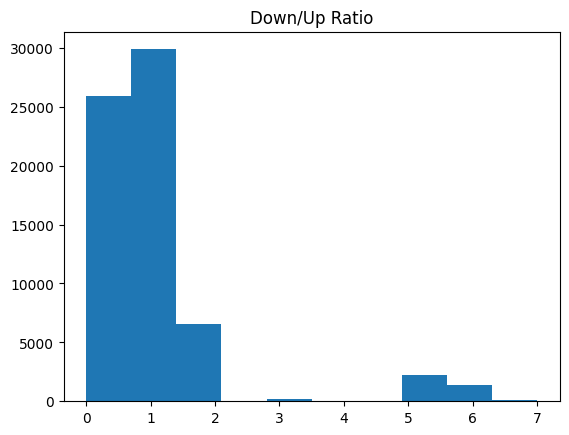

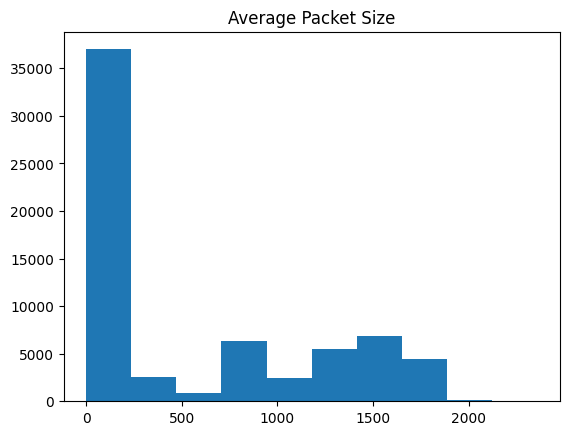

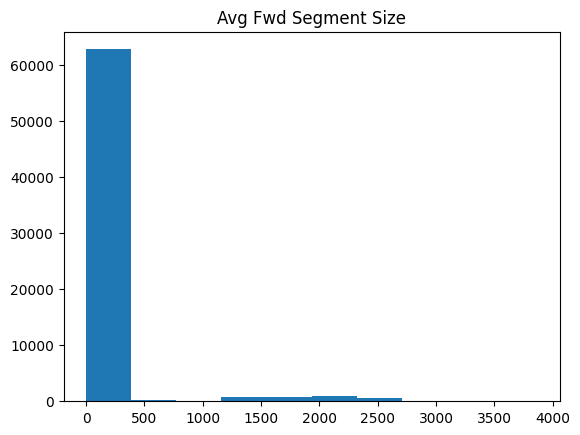

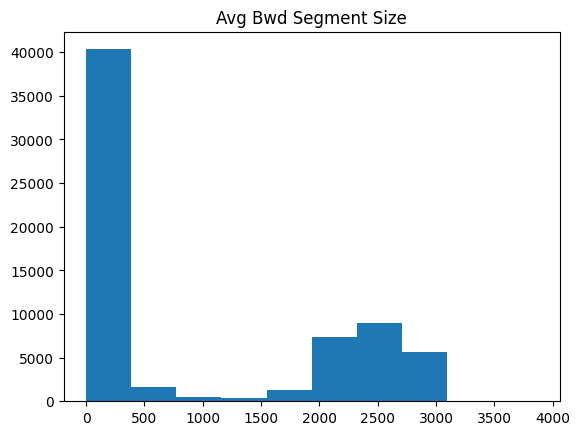

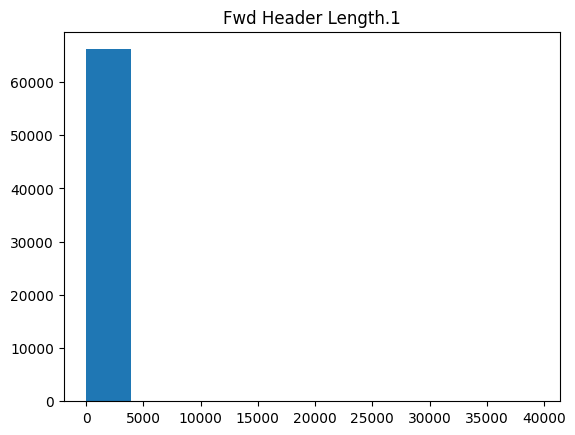

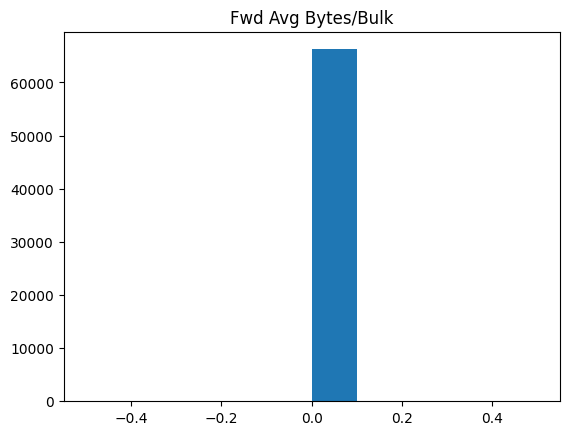

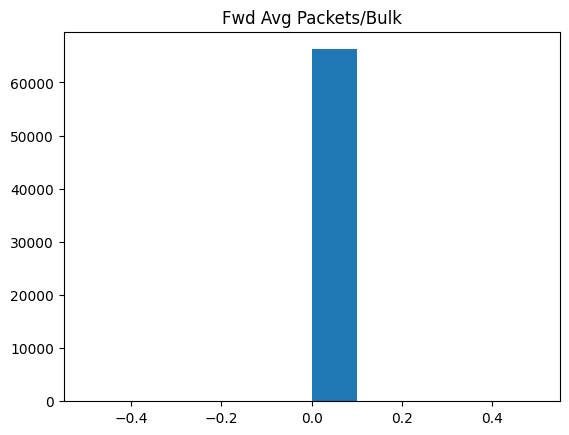

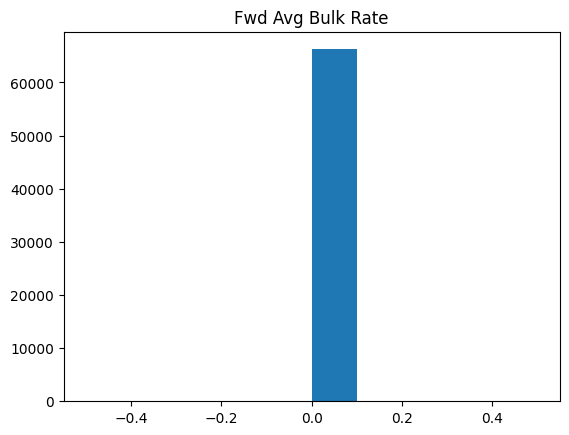

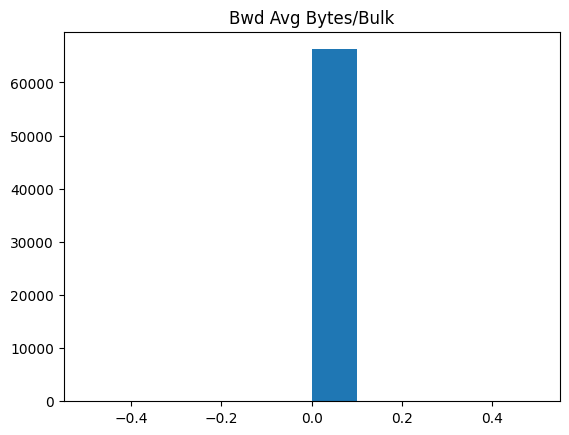

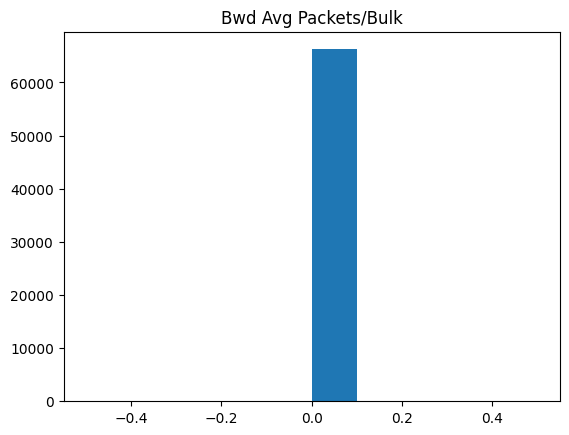

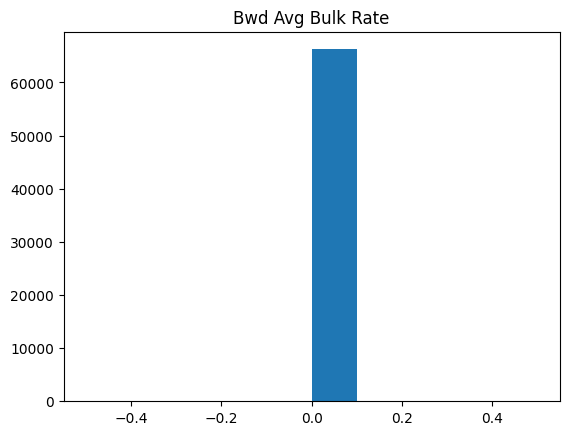

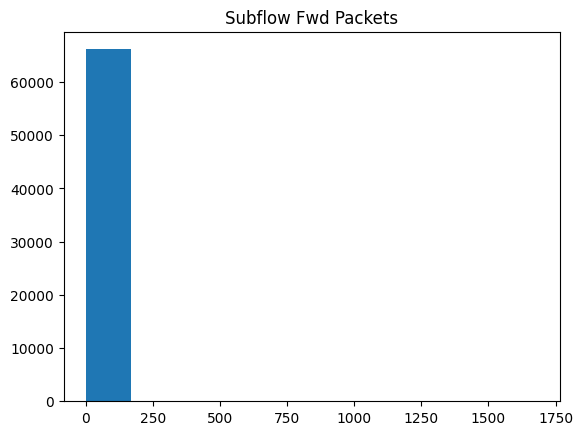

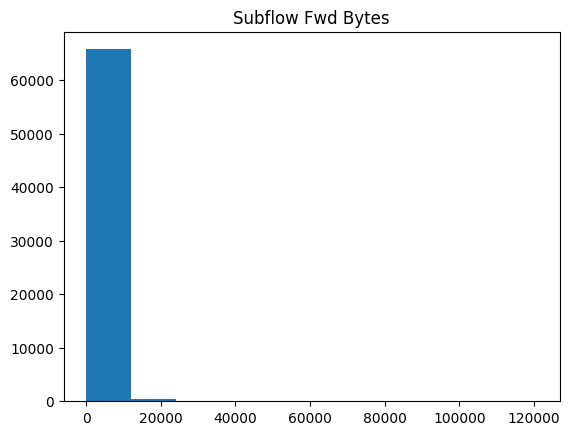

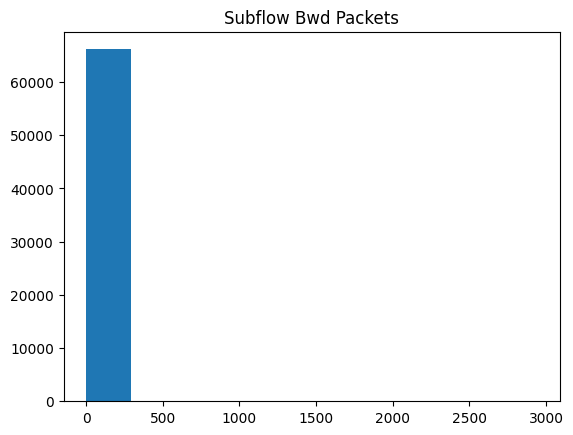

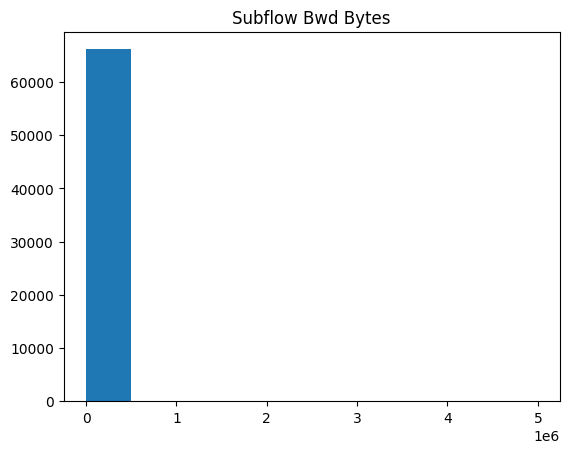

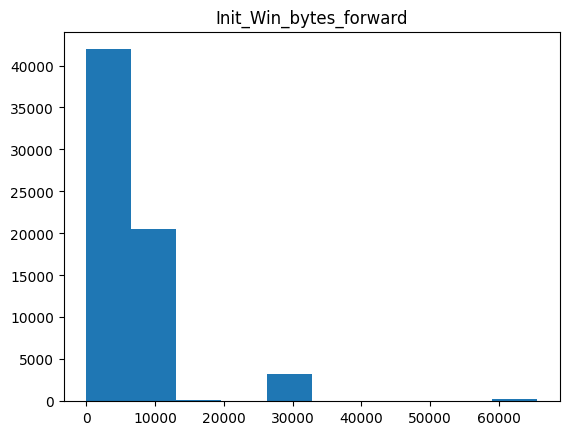

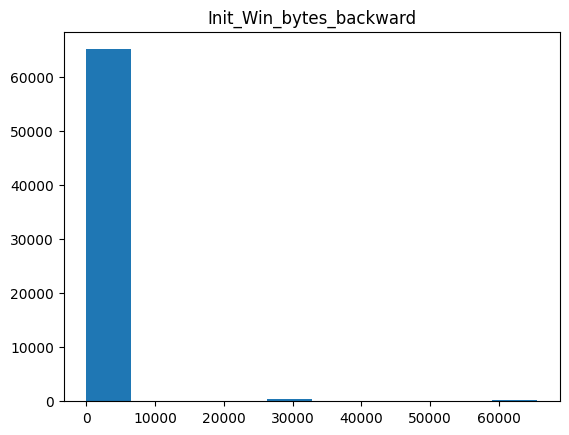

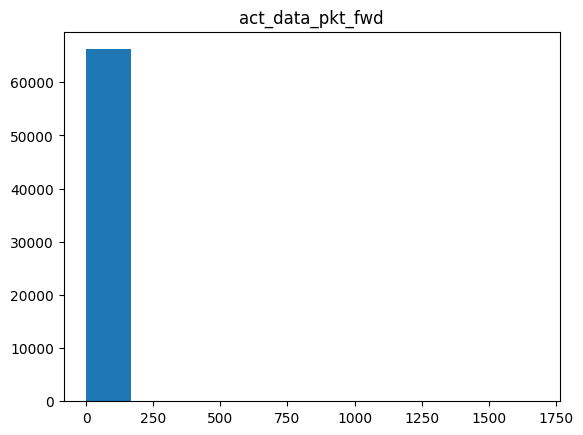

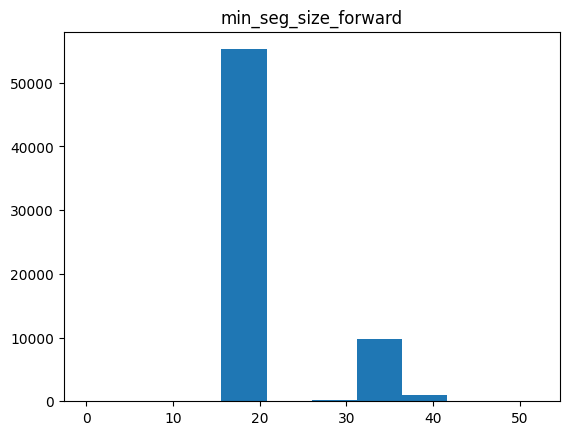

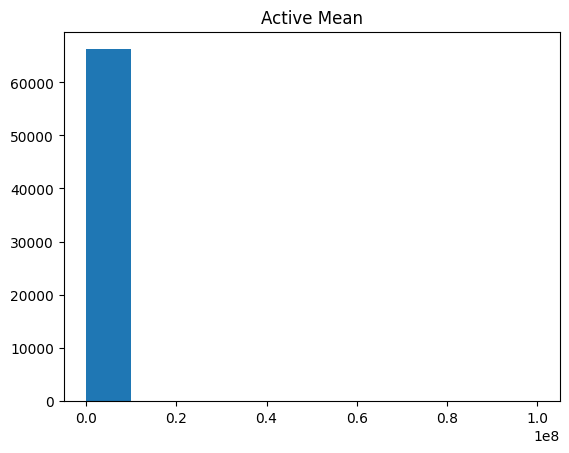

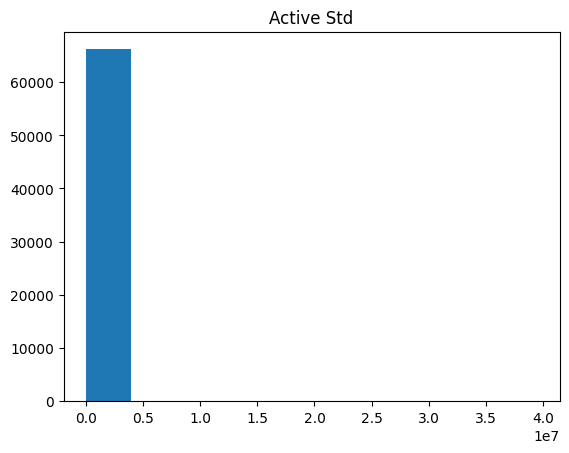

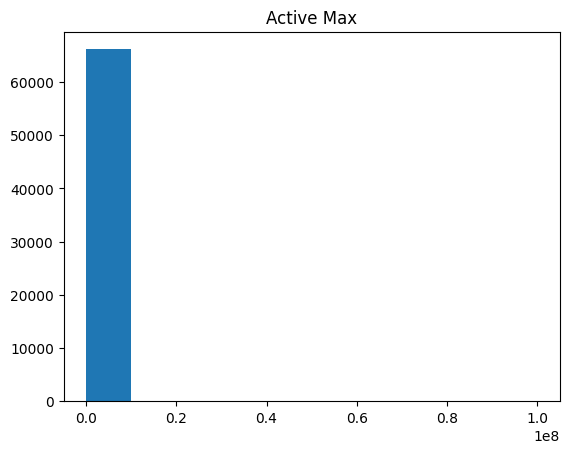

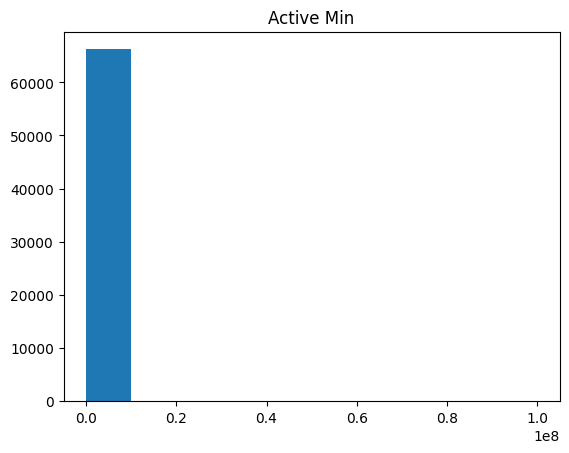

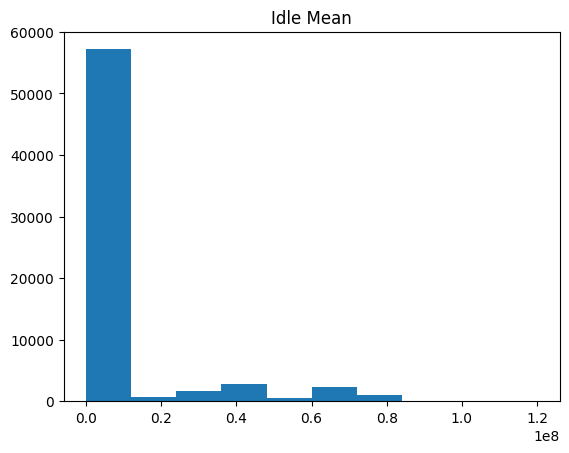

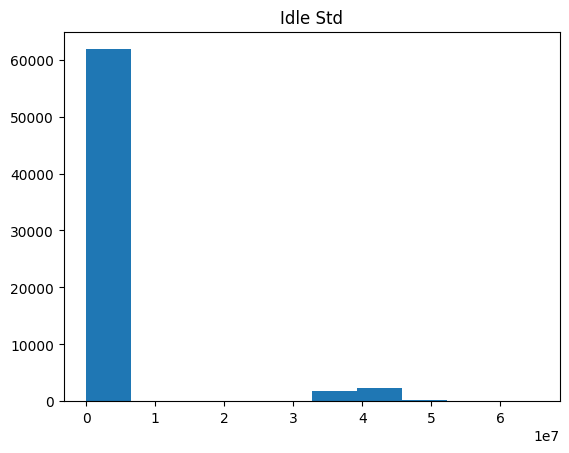

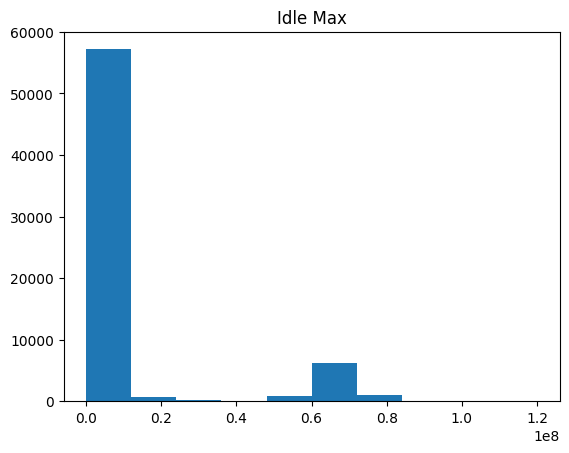

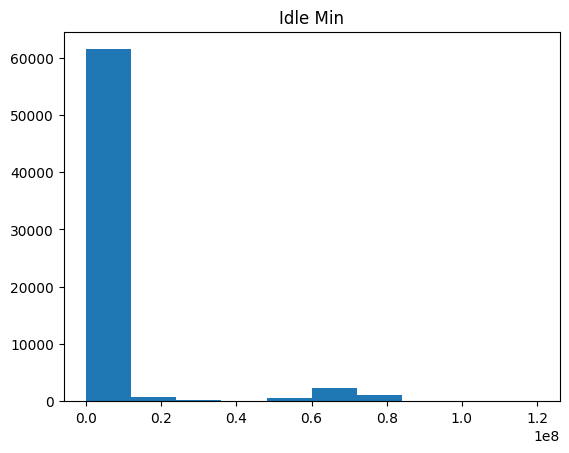

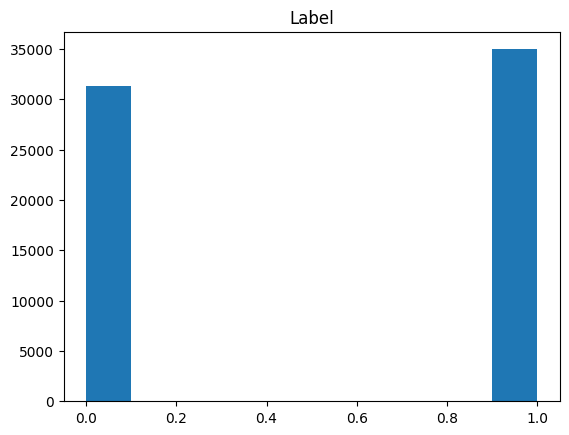

In [ ]:
# Create a histogram plot for each feature
plt.figure(5)
for col in data_f.columns:
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

# train test split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# Split data into features and target variable
X = data_f.drop('Label', axis=1)
y = data_f['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (46365, 78)
The test dataset size =  (19871, 78)


# **Machine Learning** model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

**Random Forest**

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

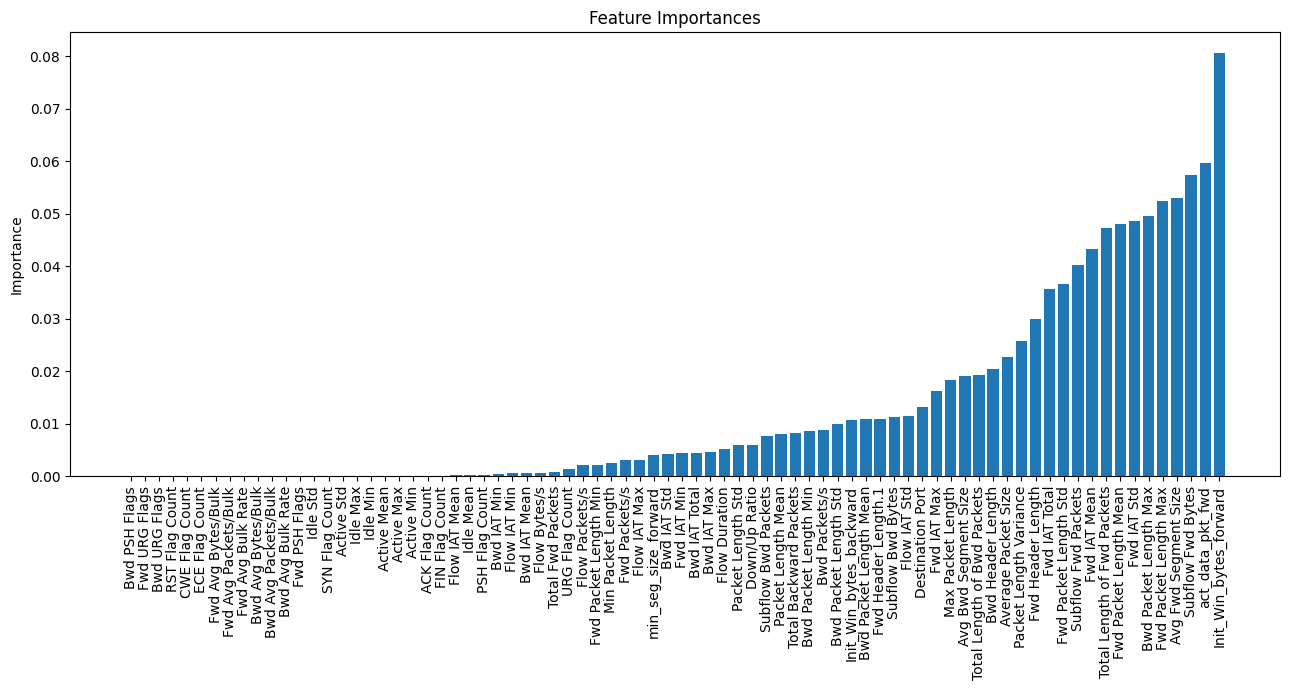

In [ ]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_
# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)

# Assuming you had column names before scaling, and 'df' is your original DataFrame:
feature_names = df.drop('Label', axis=1).columns[indices]  # Use original DataFrame's columns

# If 'df' is not available or column names were lost, use generic names:
# feature_names = [f"Feature {i}" for i in indices]


# Create the plot
plt.figure(figsize=(13, 7))
plt.bar(feature_names, importances[indices])
plt.xticks(rotation=90)
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

Number of estimators: 50


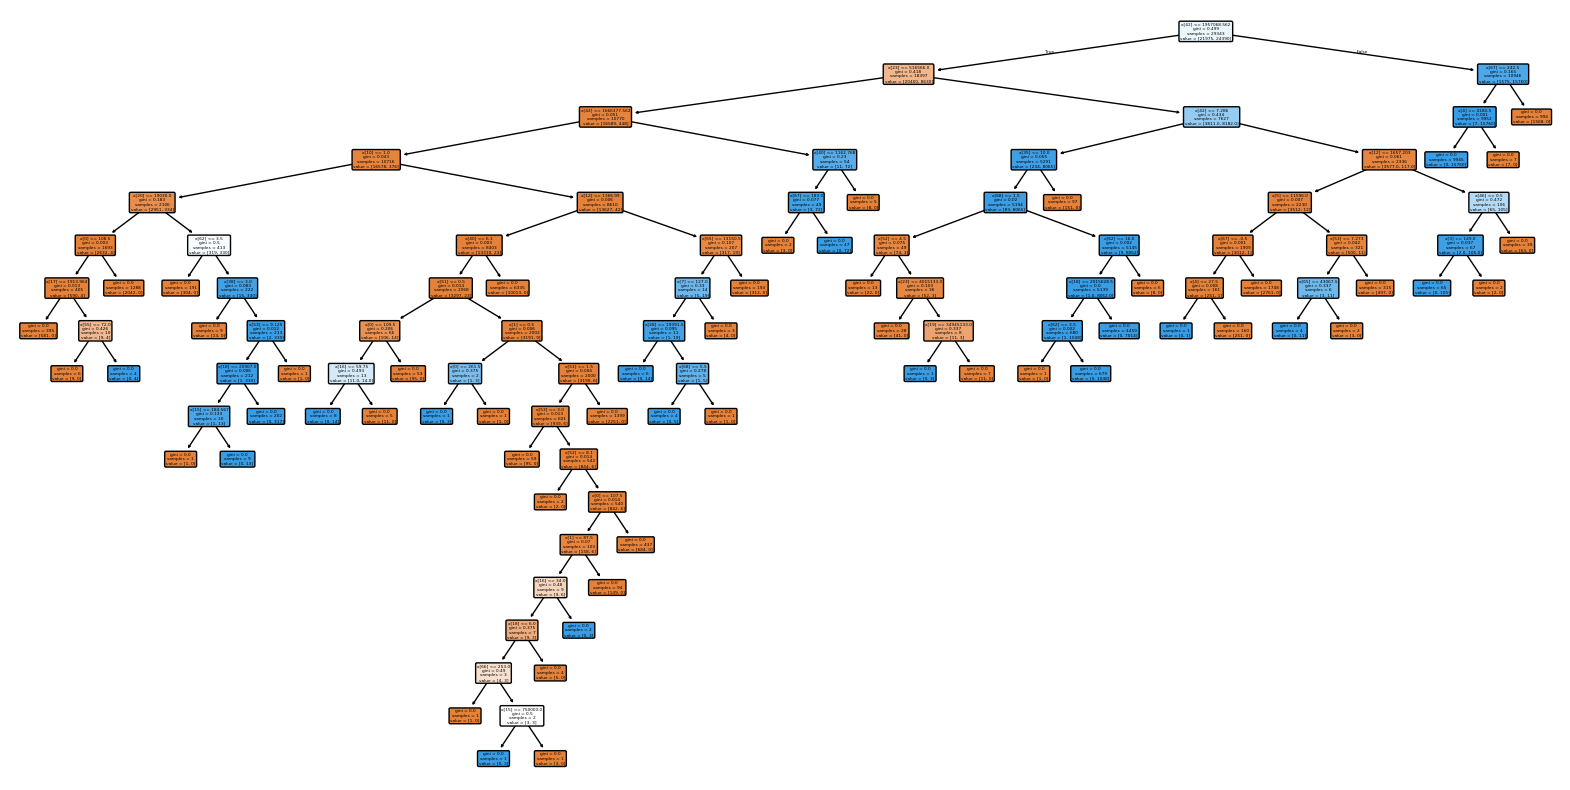

In [ ]:
from sklearn.tree import plot_tree

# Get the number of estimators
num_estimators = len(rf_model.estimators_)
print(f"Number of estimators: {num_estimators}")

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

# Model evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [ ]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [ ]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 0.9995
F1 Score: 0.9995
Precision: 1.0000
Recall: 0.9990


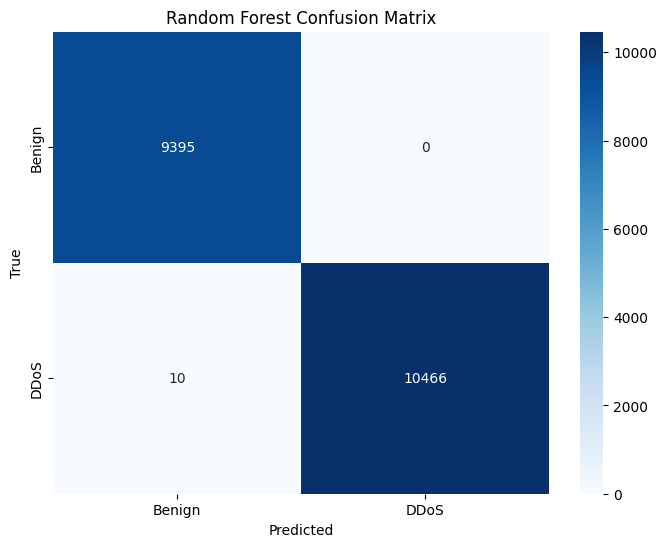

In [ ]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

# Logistic Regression

In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluate Logistic Regression

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [ ]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')


Logistic Regression Metrics:
Accuracy: 0.9447
F1 Score: 0.9499
Precision: 0.9102
Recall: 0.9931


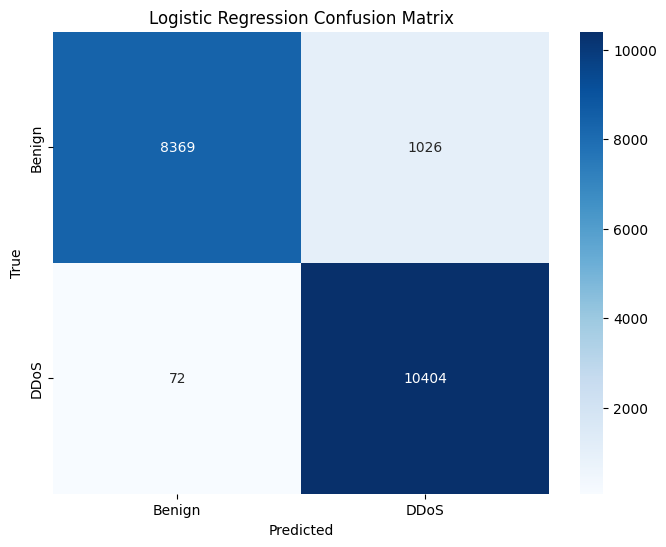

In [ ]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')

# Neural Network

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Evaluate Neural Network

In [ ]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9824
F1 Score: 0.9832
Precision: 0.9922
Recall: 0.9743


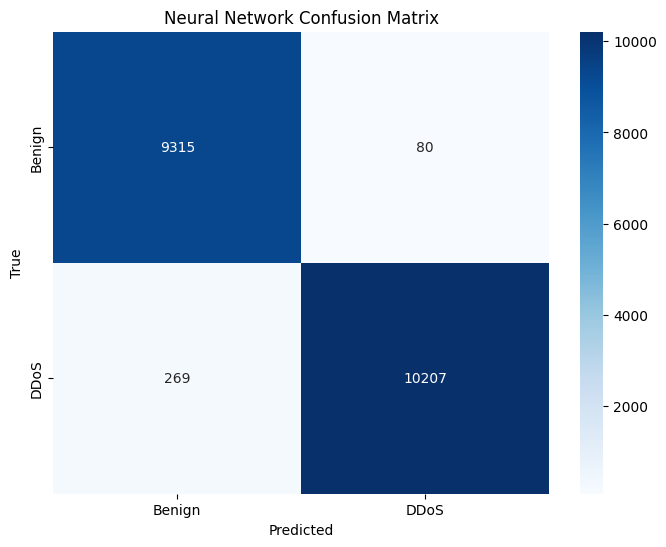

In [ ]:
# Confusion Matrix for Neural Network
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')

In [ ]:
# svm_model = SVC(random_state=42)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)

print('\nSVM Metrics:')
print(f'Accuracy: {svm_accuracy:.4f}')
print(f'F1 Score: {svm_f1:.4f}')
print(f'Precision: {svm_precision:.4f}')
print(f'Recall: {svm_recall:.4f}')


SVM Metrics:
Accuracy: 0.9517
F1 Score: 0.9540
Precision: 0.9568
Recall: 0.9513


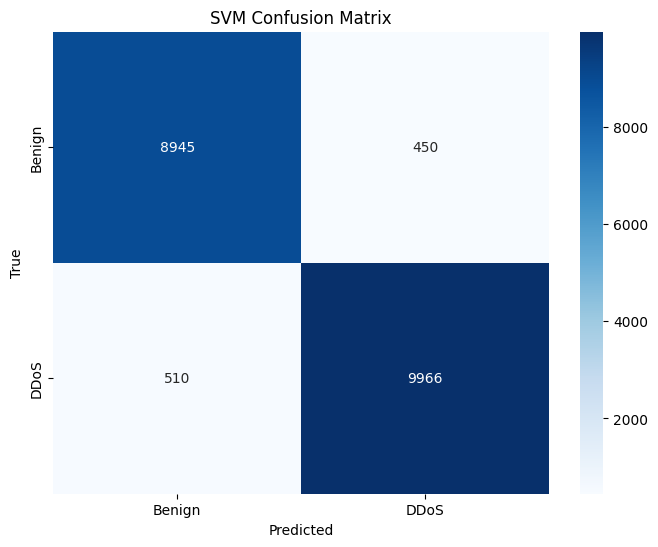

In [ ]:
# Confusion Matrix for SVM
plot_confusion_matrix(y_test, svm_pred, ['Benign', 'DDoS'], 'SVM Confusion Matrix')

# Model Optimization

# Model Comparison

In [ ]:
# # Random Forest
# rf_proba = rf_model.predict_proba(X_test)

# # Logistic Regression
# lr_proba = lr_model.predict_proba(X_test)



# # Neural Network
# nn_proba = nn_model.predict_proba(X_test)

In [ ]:
# Random Forest
rf_proba = rf_model.predict_proba(X_test)

# Logistic Regression
lr_proba = lr_model.predict_proba(X_test)

# Neural Network
nn_proba = nn_model.predict_proba(X_test)

# SVM (with probability enabled during training)
svm_proba = svm_model.predict_proba(X_test)

In [ ]:
# # Combine predictions for ROC curve



# # Calculate ROC curve for Random Forest
# rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
# rf_auc = auc(rf_fpr, rf_tpr)

# # Calculate ROC curve for Logistic Regression
# lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
# lr_auc = auc(lr_fpr, lr_tpr)



# # Calculate ROC curve for Neural Network
# nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
# nn_auc = auc(nn_fpr, nn_tpr)

In [ ]:
# Combine predictions for ROC curve

# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)

# Calculate ROC curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)

# Calculate ROC curve for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_proba[:, 1])
svm_auc = auc(svm_fpr, svm_tpr)

In [ ]:
# # Plot ROC curves for all models
# plt.figure(figsize=(8, 6))
# plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
# plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
# plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')

# # Plot ROC curve for random classifier (50% area)
# plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.grid()
# plt.show()

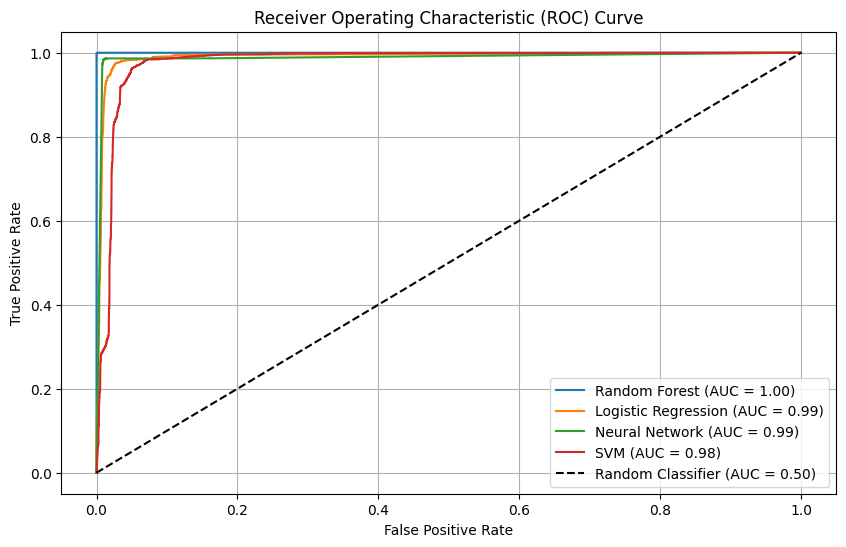

In [ ]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')  # Add SVM curve

# Plot ROC curve for random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# # identify the best performing model based on AUC-ROC

# # Assuming you have already calculated rf_auc, lr_auc, and nn_auc

# model_aucs = {
#     'Random Forest': rf_auc,
#     'Logistic Regression': lr_auc,
#     'Neural Network': nn_auc
# }

# best_model = max(model_aucs, key=model_aucs.get)
# best_auc = model_aucs[best_model]

# print(f"The best performing model based on AUC-ROC is: {best_model}")
# print(f"AUC-ROC score: {best_auc:.4f}")


In [ ]:
# identify the best performing model based on AUC-ROC

# Assuming you have already calculated rf_auc, lr_auc, nn_auc, and svm_auc

model_aucs = {
    'Random Forest': rf_auc,
    'Logistic Regression': lr_auc,
    'Neural Network': nn_auc,
    'SVM': svm_auc  # Add SVM to the dictionary
}

best_model = max(model_aucs, key=model_aucs.get)
best_auc = model_aucs[best_model]

print(f"The best performing model based on AUC-ROC is: {best_model}")
print(f"AUC-ROC score: {best_auc:.4f}")

The best performing model based on AUC-ROC is: Random Forest
AUC-ROC score: 1.0000


In [ ]:
# # Create a summary table for the model results

# import pandas as pd
# model_results = {
#     'Model': ['Random Forest', 'Logistic Regression', 'Neural Network'],
#     'Accuracy': [rf_accuracy, lr_accuracy, nn_accuracy],
#     'Precision': [rf_precision, lr_precision, nn_precision],
#     'Recall': [rf_recall, lr_recall, nn_recall],
#     'F1 Score': [rf_f1, lr_f1, nn_f1],
#     'AUC': [rf_auc, lr_auc, nn_auc]
# }

# results_df = pd.DataFrame(model_results)
# results_df


In [ ]:
import pandas as pd

model_results = {
    'Model': ['Random Forest', 'Logistic Regression', 'Neural Network', 'SVM'],  # Added SVM
    'Accuracy': [rf_accuracy, lr_accuracy, nn_accuracy, svm_accuracy],  # Added svm_accuracy
    'Precision': [rf_precision, lr_precision, nn_precision, svm_precision],  # Added svm_precision
    'Recall': [rf_recall, lr_recall, nn_recall, svm_recall],  # Added svm_recall
    'F1 Score': [rf_f1, lr_f1, nn_f1, svm_f1],  # Added svm_f1
    'AUC': [rf_auc, lr_auc, nn_auc, svm_auc]  # Added svm_auc
}

results_df = pd.DataFrame(model_results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Random Forest,0.999497,1.000000,0.999045,0.999522,1.000000
1,Logistic Regression,0.944744,0.910236,0.993127,0.949877,0.990428
2,Neural Network,0.982437,0.992223,0.974322,0.983191,0.988108
3,SVM,0.951688,0.956797,0.951317,0.954049,0.979258


In [ ]:
# # Create a bar chart for each metric
# metrics = ['auc_roc', 'precision', 'recall', 'f1_score']
# # Create a sample DataFrame (Replace with your actual data)
# summary_df = pd.DataFrame({
#     'auc_roc': [rf_auc, lr_auc, nn_auc],  # Assuming you have these values from previous calculations
#     'precision': [rf_precision, lr_precision, nn_precision],
#     'recall': [rf_recall, lr_recall, nn_recall],
#     'f1_score': [rf_f1, lr_f1, nn_f1]
# }, index=['Random Forest', 'Logistic Regression', 'Neural Network'])


# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
# fig.suptitle('Model Performance Comparison', fontsize=16)

# for i, metric in enumerate(metrics):
#     row = i // 2
#     col = i % 2
#     ax = axes[row, col]
#     ax.bar(summary_df.index, summary_df[metric])
#     ax.set_title(metric.upper())
#     ax.set_ylabel('Score')
#     ax.set_xlabel('Model')
#     ax.tick_params(axis='x', rotation=45)

# plt.tight_layout()
# plt.show()

**Bar Chart**

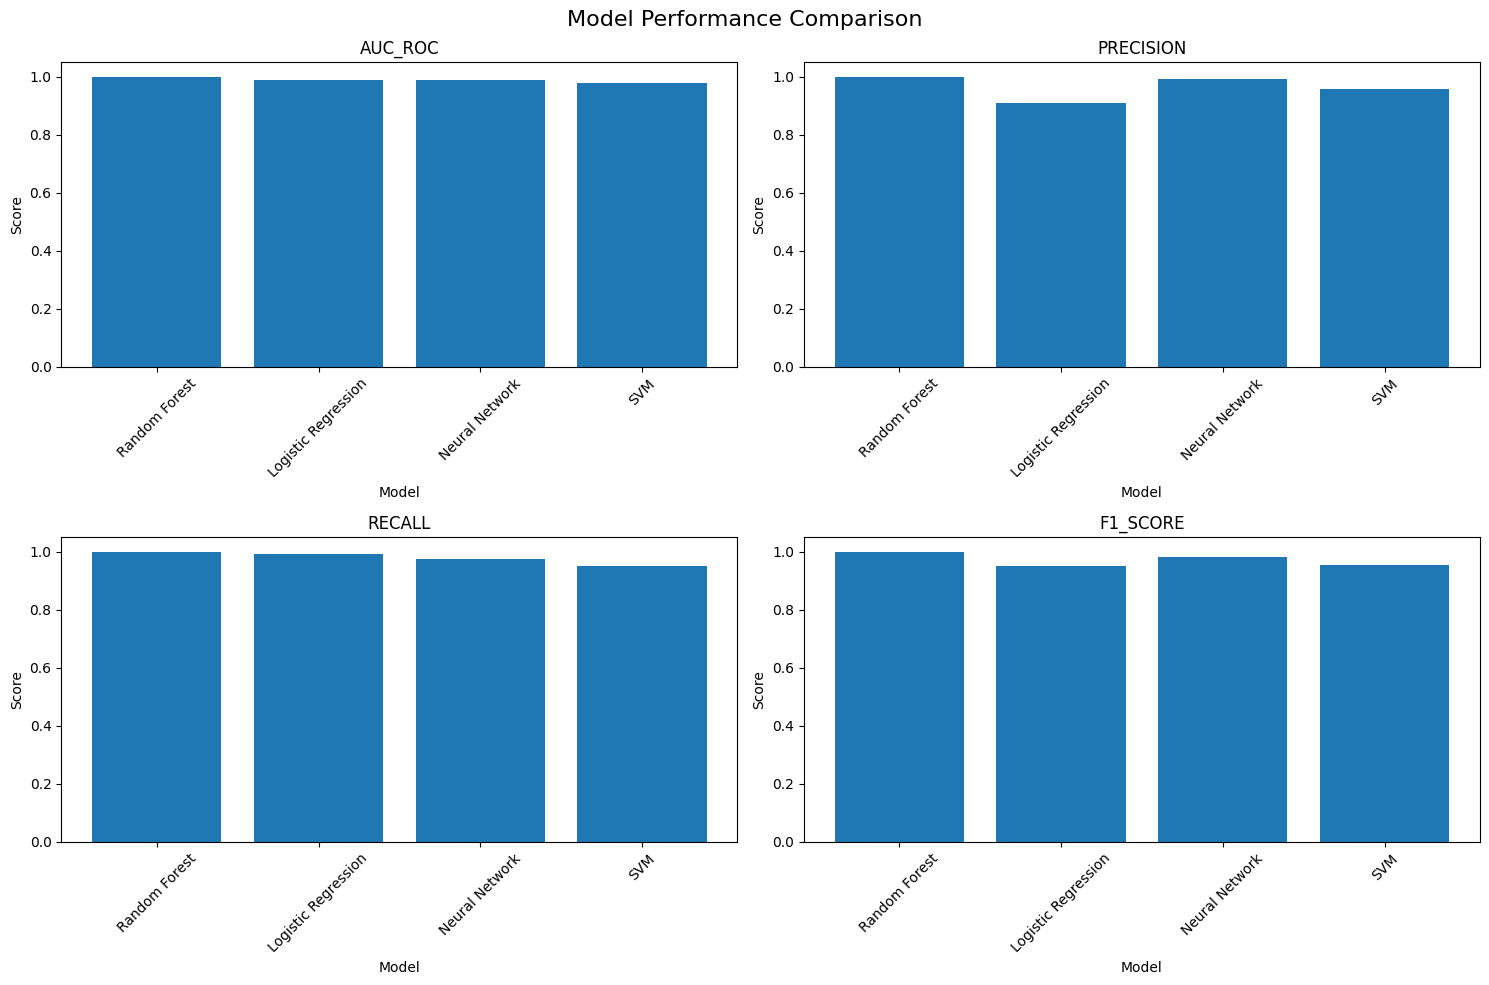

In [ ]:
# Create a bar chart for each metric
metrics = ['auc_roc', 'precision', 'recall', 'f1_score']

# Create a sample DataFrame (Replace with your actual data)
# Include SVM in the DataFrame
summary_df = pd.DataFrame({
    'auc_roc': [rf_auc, lr_auc, nn_auc, svm_auc],  # Add svm_auc here
    'precision': [rf_precision, lr_precision, nn_precision, svm_precision],  # Add svm_precision
    'recall': [rf_recall, lr_recall, nn_recall, svm_recall],  # Add svm_recall
    'f1_score': [rf_f1, lr_f1, nn_f1, svm_f1]  # Add svm_f1
}, index=['Random Forest', 'Logistic Regression', 'Neural Network', 'SVM'])  # Add SVM to index


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16)

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.bar(summary_df.index, summary_df[metric])
    ax.set_title(metric.upper())
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Line Chart**

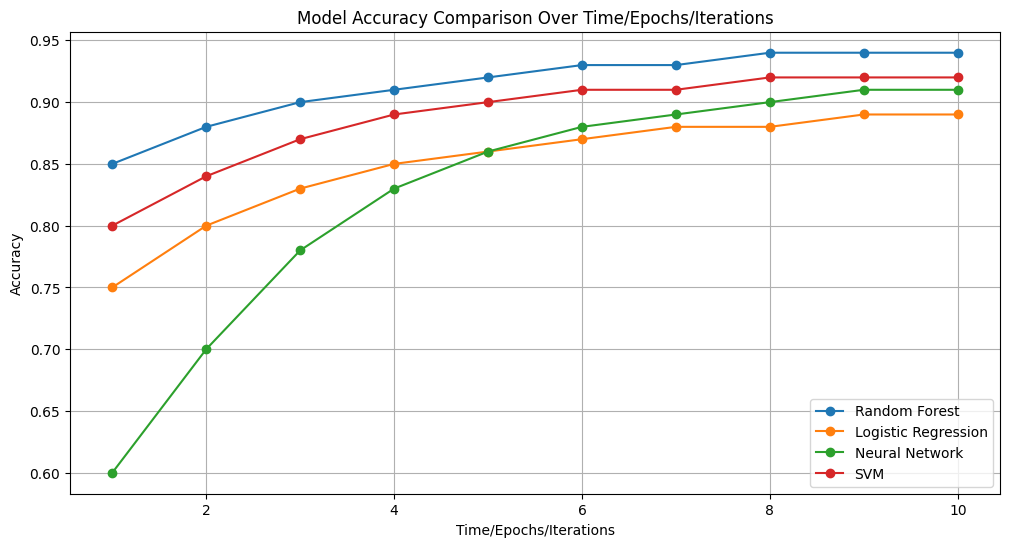

In [ ]:
model_names = ['Random Forest', 'Logistic Regression', 'Neural Network', 'SVM']

epochs = np.arange(1, 11)
rf_accuracy_history = [0.85, 0.88, 0.90, 0.91, 0.92, 0.93, 0.93, 0.94, 0.94, 0.94]
lr_accuracy_history = [0.75, 0.80, 0.83, 0.85, 0.86, 0.87, 0.88, 0.88, 0.89, 0.89]
nn_accuracy_history = [0.60, 0.70, 0.78, 0.83, 0.86, 0.88, 0.89, 0.90, 0.91, 0.91]
svm_accuracy_history = [0.80, 0.84, 0.87, 0.89, 0.90, 0.91, 0.91, 0.92, 0.92, 0.92]


# Store data in a dictionary for easier plotting
model_history = {
    'Random Forest': rf_accuracy_history,
    'Logistic Regression': lr_accuracy_history,
    'Neural Network': nn_accuracy_history,
    'SVM': svm_accuracy_history
}

# Create the line chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

for model_name, accuracy_history in model_history.items():
    plt.plot(epochs, accuracy_history, marker='o', linestyle='-', label=model_name)

# Customize the chart
plt.title('Model Accuracy Comparison Over Time/Epochs/Iterations')
plt.xlabel('Time/Epochs/Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show the chart
plt.show()

# Model Optimization

In [ ]:
# prompt:     Model optimization: Tune hyperparameters for the all models using techniques like grid search or randomized search on the validation set.

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Example for Random Forest (adapt for other models)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_
rf_pred = best_rf_model.predict(X_test)



param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'), param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

print("\nBest hyperparameters for Logistic Regression:", grid_search_lr.best_params_)
best_lr_model = grid_search_lr.best_estimator_
lr_pred = best_lr_model.predict(X_test)



param_grid_nn = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}


grid_search_nn = RandomizedSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid_nn, cv=5, n_iter=10, scoring='accuracy', random_state=42)
grid_search_nn.fit(X_train, y_train)


print("\nBest hyperparameters for Neural Network:", grid_search_nn.best_params_)
best_nn_model = grid_search_nn.best_estimator_
nn_pred = best_nn_model.predict(X_test)



param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

print("\nBest hyperparameters for SVM:", grid_search_svm.best_params_)
best_svm_model = grid_search_svm.best_estimator_
svm_pred = best_svm_model.predict(X_test)


Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w


Best hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l1'}

Best hyperparameters for Neural Network: {'hidden_layer_sizes': (100,), 'alpha': 0.001, 'activation': 'relu'}


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grids for each model
# param_grid_rf = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# param_grid_lr = {
#     'C': [0.1, 1, 10],
#     'penalty': ['l1', 'l2']
# }

# param_grid_nn = {
#     'hidden_layer_sizes': [(10,), (50,), (100,)],
#     'alpha': [0.0001, 0.001, 0.01],
#     'max_iter': [200, 500, 1000]
# }

# param_grid_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly']
# }

# # Create GridSearchCV objects for each model
# grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
# grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='roc_auc')
# grid_search_nn = GridSearchCV(MLPClassifier(random_state=42), param_grid_nn, cv=5, scoring='roc_auc')
# grid_search_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5, scoring='roc_auc')


# # Fit the GridSearchCV objects to the training data
# grid_search_rf.fit(X_train, y_train)
# grid_search_lr.fit(X_train, y_train)
# grid_search_nn.fit(X_train, y_train)
# grid_search_svm.fit(X_train, y_train)

# # Get the best models and their predictions
# best_rf_model = grid_search_rf.best_estimator_
# best_lr_model = grid_search_lr.best_estimator_
# best_nn_model = grid_search_nn.best_estimator_
# best_svm_model = grid_search_svm.best_estimator_

# best_rf_pred = best_rf_model.predict(X_test)
# best_lr_pred = best_lr_model.predict(X_test)
# best_nn_pred = best_nn_model.predict(X_test)
# best_svm_pred = best_svm_model.predict(X_test)

# # Evaluate the best models
# print("Best Random Forest Accuracy:", accuracy_score(y_test, best_rf_pred))
# print("Best Logistic Regression Accuracy:", accuracy_score(y_test, best_lr_pred))
# print("Best Neural Network Accuracy:", accuracy_score(y_test, best_nn_pred))
# print("Best SVM Accuracy:", accuracy_score(y_test, best_svm_pred))
